In [29]:
import pandas as pd
import numpy as np

In [30]:
from sklearn.preprocessing import LabelEncoder

# CLUSTERING BY RESIDUE

## Data Transformation

In [31]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# find residues where interactions are made

# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create empty lists for column counts and residue numbers
int_counts = []
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)
    count = len(df.loc[(df[col] != 0) & (df[col].notnull())])
    int_counts.append(count)

#len([x for x in int_counts if x != 0])

# find columns where no interactions are made

non_int_resnums = []

for i in range(len(int_counts)):
    if int_counts[i] == 0:
        non_int_resnums.append(resnums[i])

# get list of interacting residues
# get columns with 'sum' in their name
sum_cols = [col for col in df.columns if 'sum' in col]

# create NEW empty lists for column counts and residue numbers
int_counts = []
int_resnums = []

for col in sum_cols:
    resnum = col[:4]
    if resnum not in non_int_resnums:
        int_resnums.append(resnum)
    
display(df)

index PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0        1  7EW2        Active     Agonist                NaN           NaN   
1        2  7EW3        Active     Agonist                NaN           NaN   
2        3  7EW4        Active     Agonist                NaN           NaN   
3        4  7EW1        Active     Agonist                NaN           NaN   
4        5  7LD4        Active     Agonist                NaN           NaN   
..     ...   ...           ...         ...                ...           ...   
359    387  5C1M        Active     Agonist                NaN           NaN   
360    388  4EJ4      Inactive  Antagonist                NaN           NaN   
361    389  4DKL      Inactive  Antagonist                NaN           NaN   
362    390  6Z10  Intermediate  Antagonist                0.0          None   
363    391  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  ...  \
0                NaN           NaN              NaN                NaN  ...   
1                NaN           NaN              NaN                NaN  ...   
2                NaN           NaN              NaN                NaN  ...   
3                NaN           NaN              NaN                NaN  ...   
4                NaN           NaN              NaN                NaN  ...   
..               ...           ...              ...                ...  ...   
359              NaN           NaN              NaN                NaN  ...   
360              NaN           NaN              NaN                NaN  ...   
361              NaN           NaN              NaN                NaN  ...   
362              0.0          None              0.0                0.0  ...   
363              0.0          None              0.0                0.0  ...   

    7.67_intenergysum  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0                 NaN            NaN             NaN            NaN   
1                 NaN            NaN             NaN            NaN   
2                 NaN            NaN             NaN            NaN   
3                 NaN            NaN             NaN            NaN   
4                 NaN            NaN             NaN            NaN   
..                ...            ...             ...            ...   
359               NaN            NaN             NaN            NaN   
360               NaN            NaN             NaN            NaN   
361               NaN            NaN             NaN            NaN   
362               NaN            NaN             NaN            NaN   
363               NaN            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2  
0              NaN              NaN  
1              NaN              NaN  
2              NaN              NaN  
3              NaN              NaN  
4              NaN              NaN  
..             ...              ...  
359            NaN              NaN  
360            NaN              NaN  
361            NaN              NaN

In [32]:
len(non_int_resnums)

218

In [33]:
df.to_csv('df.csv')

In [34]:
# get residue numbers to serve as rows for new dataframe
resnums = []
cols = [col for col in df.columns if 'sum' in col]

for col in cols:
    resnum = col[:4]
    resnums.append(resnum)
    
#print(resnums)

In [35]:
# get list of PDBID values, states, functions
PDBIDs = list(df['PDBID'])
states = list(df['State'])
functions = list(df['Function'])
#PDBIDs

In [36]:
# generate column names for new dataframe
colnames = []

for PDBID in PDBIDs:
    colnames.append(PDBID + '_state') # new 5/17
    colnames.append(PDBID + '_function') # new 5/17
    colnames.append(PDBID + '_intenergysum')
    colnames.append(PDBID + '_inttype1')
    colnames.append(PDBID + '_intenergy1')
    colnames.append(PDBID + '_inttype2')
    colnames.append(PDBID + '_intenergy2')

In [37]:
colnames

['7EW2_state',
 '7EW2_function',
 '7EW2_intenergysum',
 '7EW2_inttype1',
 '7EW2_intenergy1',
 '7EW2_inttype2',
 '7EW2_intenergy2',
 '7EW3_state',
 '7EW3_function',
 '7EW3_intenergysum',
 '7EW3_inttype1',
 '7EW3_intenergy1',
 '7EW3_inttype2',
 '7EW3_intenergy2',
 '7EW4_state',
 '7EW4_function',
 '7EW4_intenergysum',
 '7EW4_inttype1',
 '7EW4_intenergy1',
 '7EW4_inttype2',
 '7EW4_intenergy2',
 '7EW1_state',
 '7EW1_function',
 '7EW1_intenergysum',
 '7EW1_inttype1',
 '7EW1_intenergy1',
 '7EW1_inttype2',
 '7EW1_intenergy2',
 '7LD4_state',
 '7LD4_function',
 '7LD4_intenergysum',
 '7LD4_inttype1',
 '7LD4_intenergy1',
 '7LD4_inttype2',
 '7LD4_intenergy2',
 '7LD3_state',
 '7LD3_function',
 '7LD3_intenergysum',
 '7LD3_inttype1',
 '7LD3_intenergy1',
 '7LD3_inttype2',
 '7LD3_intenergy2',
 '7RM5_state',
 '7RM5_function',
 '7RM5_intenergysum',
 '7RM5_inttype1',
 '7RM5_intenergy1',
 '7RM5_inttype2',
 '7RM5_intenergy2',
 '7M8W_state',
 '7M8W_function',
 '7M8W_intenergysum',
 '7M8W_inttype1',
 '7M8W_int

In [38]:
# create empty dataframe to fill with values from df
ml_df = pd.DataFrame()
ml_df['residue'] = resnums
temp_dict = {}

for colname in colnames:
    temp_dict[colname] = ['NA'] * len(resnums)

ml_df = pd.concat((ml_df, pd.DataFrame(temp_dict)), axis = 1)

In [39]:
ml_df = ml_df.copy()
import pickle
ml_df.to_pickle('pickles/ml_df_empty_allresidues_allpredictors_scaled.pkl')

### Read Data

In [40]:
ml_df = pd.read_pickle('pickles/ml_df_empty_allresidues_allpredictors_scaled.pkl')
display(ml_df)

residue 7EW2_state 7EW2_function 7EW2_intenergysum 7EW2_inttype1  \
0      1.21         NA            NA                NA            NA   
1      1.22         NA            NA                NA            NA   
2      1.23         NA            NA                NA            NA   
3      1.24         NA            NA                NA            NA   
4      1.25         NA            NA                NA            NA   
..      ...        ...           ...               ...           ...   
327    7.64         NA            NA                NA            NA   
328    7.65         NA            NA                NA            NA   
329    7.66         NA            NA                NA            NA   
330    7.67         NA            NA                NA            NA   
331    7.68         NA            NA                NA            NA   

    7EW2_intenergy1 7EW2_inttype2 7EW2_intenergy2 7EW3_state 7EW3_function  \
0                NA            NA              NA         NA            NA   
1                NA            NA              NA         NA            NA   
2                NA            NA              NA         NA            NA   
3                NA            NA              NA         NA            NA   
4                NA            NA              NA         NA            NA   
..              ...           ...             ...        ...           ...   
327              NA            NA              NA         NA            NA   
328              NA            NA              NA         NA            NA   
329              NA            NA              NA         NA            NA   
330              NA            NA              NA         NA            NA   
331              NA            NA              NA         NA            NA   

     ... 6Z10_intenergy1 6Z10_inttype2 6Z10_intenergy2 6RNK_state  \
0    ...              NA            NA              NA         NA   
1    ...              NA            NA              NA         NA   
2    ...              NA            NA              NA         NA   
3    ...              NA            NA              NA         NA   
4    ...              NA            NA              NA         NA   
..   ...             ...           ...             ...        ...   
327  ...              NA            NA              NA         NA   
328  ...              NA            NA              NA         NA   
329  ...              NA            NA              NA         NA   
330  ...              NA            NA              NA         NA   
331  ...              NA            NA              NA         NA   

    6RNK_function 6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0              NA                NA            NA              NA   
1              NA                NA            NA              NA   
2              NA                NA            NA              NA   
3              NA                NA            NA              NA   
4              NA                NA            NA              NA   
..            ...               ...           ...             ...   
327            NA                NA            NA              NA   
328            NA                NA            NA              NA   
329            NA                NA            NA              NA   
330            NA                NA            NA              NA   
331            NA                NA            NA              NA   

    6RNK_inttype2 6RNK_intenergy2  
0              NA              NA  
1              NA              NA  
2              NA              NA  
3              NA              NA  
4              NA              NA  
..            ...             ...  
327            NA              NA  
328            NA              NA  
329            NA              NA  
330            NA              NA  
331            NA              NA  

[332 rows x 2549 columns]

In [41]:
for df_row in range(len(df)): # row represents df rows
    # get state and ligand function from the row, assign to separate variables
    state = df.loc[df_row, :].values.tolist()[2]
    function = df.loc[df_row, :].values.tolist()[3]
    
    # get state and function columns for each row
    
    # convert row to a flattened list, dropping the first 4 columns
    row_values = df.loc[df_row, :].values.tolist()[4:]
    # print(row_values, '\n')
    
    row_idx = 0 # row index
    col_idx = (df_row * 7) + 3 # start at col 1 for 1st entry, col 8 for 2nd entry, etc.
    col_end_idx = (df_row * 7) + 7
    
    for value in row_values:
        if col_idx > col_end_idx:
            row_idx += 1 # start on next row in ml_df
            col_idx = (df_row * 7) + 3 # reset column numbering
        ml_df.at[row_idx, ml_df.columns[col_idx]] = value # write new value to column col_idx of next row
        col_idx += 1

# fill in state/function columns for each PDBID
for PDBid in PDBIDs:
    state_col = PDBid + '_state'
    function_col = PDBid + '_function'
    
    ml_df.loc[:, state_col] = states[PDBIDs.index(PDBid)]
    ml_df.loc[:, function_col] = functions[PDBIDs.index(PDBid)]

In [42]:
ml_df.columns[1:]

Index(['7EW2_state', '7EW2_function', '7EW2_intenergysum', '7EW2_inttype1',
       '7EW2_intenergy1', '7EW2_inttype2', '7EW2_intenergy2', '7EW3_state',
       '7EW3_function', '7EW3_intenergysum',
       ...
       '6Z10_intenergy1', '6Z10_inttype2', '6Z10_intenergy2', '6RNK_state',
       '6RNK_function', '6RNK_intenergysum', '6RNK_inttype1',
       '6RNK_intenergy1', '6RNK_inttype2', '6RNK_intenergy2'],
      dtype='object', length=2548)

In [43]:
# # drop all columns except interaction energies
# # drop non 'intenergysum' columns
# for col in ml_df.columns[1:]:
#     if 'intenergysum' not in col:
#         ml_df.drop([col], axis = 1, inplace = True)

In [44]:
# drop state/function columns
for col in ml_df.columns[1:]:
    if 'state' in col or 'function' in col:
        ml_df.drop([col], axis = 1, inplace = True)

In [45]:
display(ml_df)

residue 7EW2_intenergysum 7EW2_inttype1 7EW2_intenergy1 7EW2_inttype2  \
0      1.21               NaN           NaN             NaN           NaN   
1      1.22               NaN           NaN             NaN           NaN   
2      1.23               NaN           NaN             NaN           NaN   
3      1.24               NaN           NaN             NaN           NaN   
4      1.25               NaN           NaN             NaN           NaN   
..      ...               ...           ...             ...           ...   
327    7.64               NaN           NaN             NaN           NaN   
328    7.65               NaN           NaN             NaN           NaN   
329    7.66               NaN           NaN             NaN           NaN   
330    7.67               NaN           NaN             NaN           NaN   
331    7.68               NaN           NaN             NaN           NaN   

    7EW2_intenergy2 7EW3_intenergysum 7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN           NaN             NaN   
1               NaN               NaN           NaN             NaN   
2               NaN               NaN           NaN             NaN   
3               NaN               NaN           NaN             NaN   
4               NaN               NaN           NaN             NaN   
..              ...               ...           ...             ...   
327             NaN               NaN           NaN             NaN   
328             NaN               NaN           NaN             NaN   
329             NaN               NaN           NaN             NaN   
330             NaN               NaN           NaN             NaN   
331             NaN               NaN           NaN             NaN   

    7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1 6Z10_intenergy1  \
0             NaN  ...               0.0          None             0.0   
1             NaN  ...               0.0          None             0.0   
2             NaN  ...               0.0          None             0.0   
3             NaN  ...               0.0          None             0.0   
4             NaN  ...               0.0          None             0.0   
..            ...  ...               ...           ...             ...   
327           NaN  ...               NaN           NaN             NaN   
328           NaN  ...               NaN           NaN             NaN   
329           NaN  ...               NaN           NaN             NaN   
330           NaN  ...               NaN           NaN             NaN   
331           NaN  ...               NaN           NaN             NaN   

    6Z10_inttype2 6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0            None             0.0               0.0          None   
1            None             0.0               0.0          None   
2            None             0.0               0.0          None   
3            None             0.0               0.0          None   
4            None             0.0               0.0          None   
..            ...             ...               ...           ...   
327           NaN             NaN               NaN           NaN   
328           NaN             NaN               NaN           NaN   
329           NaN             NaN               NaN           NaN   
330           NaN             NaN               NaN           NaN   
331           NaN             NaN               NaN           NaN   

    6RNK_intenergy1 6RNK_inttype2 6RNK_intenergy2  
0               0.0          None             0.0  
1               0.0          None             0.0  
2               0.0          None             0.0  
3               0.0          None             0.0  
4               0.0          None             0.0  
..              ...           ...             ...  
327             NaN           NaN             NaN  
328             NaN           NaN             NaN  
329             NaN           NaN       

In [46]:
# get unique interaction types
cols = [col for col in df.columns if 'type' in col]
int_types = []

for col in cols:
    for int_type in list(df[col].unique()):
        #print(type(int_type))
        if int_type not in int_types and int_type != 'None' and isinstance(int_type, str):
            int_types.append(int_type)
            
print(int_types)

['Hbond', 'Arene', 'Ionic', 'Distance', 'Covalent']


In [47]:
# pickle ml_df that is filled with data but not scaled or imputed
ml_df.to_pickle('pickles/ml_df_filled_allresidues_allpredictors_scaled.pkl')

In [48]:
# encode interaction types as integers (only necessary if inttype1/2 columns are in the dataframe)

if any("type" in s for s in list(ml_df.columns)):
    
    # create instance of labelencoder
    labelencoder = LabelEncoder()

    # get columns with 'type' in their name
    cols = [col for col in ml_df.columns if 'type' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        ml_df[col] = labelencoder.fit_transform(ml_df[col])


    # encode states as integers
    # get columns with 'type' in their name
    cols = [col for col in ml_df.columns if 'state' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        ml_df[col] = labelencoder.fit_transform(ml_df[col])

    # encode functions as integers
    # get columns with 'type' in their name
    cols = [col for col in ml_df.columns if 'function' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        ml_df[col] = labelencoder.fit_transform(ml_df[col])

In [49]:
display(ml_df)

residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_intenergysum 6Z10_inttype1  6Z10_intenergy1  \
0                4  ...               0.0             3              0.0   
1                4  ...               0.0             3              0.0   
2                4  ...               0.0             3              0.0   
3                4  ...               0.0             3              0.0   
4                4  ...               0.0             3              0.0   
..             ...  ...               ...           ...              ...   
327              4  ...               NaN             4              NaN   
328              4  ...               NaN             4              NaN   
329              4  ...               NaN             4              NaN   
330              4  ...               NaN             4              NaN   
331              4  ...               NaN             4              NaN   

    6Z10_inttype2  6Z10_intenergy2 6RNK_intenergysum 6RNK_inttype1  \
0               4              0.0               0.0             3   
1               4              0.0               0.0             3   
2               4              0.0               0.0             3   
3               4              0.0               0.0             3   
4               4              0.0               0.0             3   
..            ...              ...               ...           ...   
327             5              NaN               NaN             4   
328             5              NaN               NaN             4   
329             5              NaN               NaN             4   
330             5              NaN               NaN             4   
331             5              NaN               NaN             4   

     6RNK_intenergy1 6RNK_inttype2  6RNK_intenergy2  
0                0.0             4              0.0  
1                0.0             4              0.0  
2                0.0             4              0.0  
3                0.0             4              0.0  
4                0.0             4              0.0  
..               ...           ...              ...  
327              NaN             5              NaN  
328 

In [50]:
ml_df.to_csv('ml_df_test.csv')

---
# Machine Learning

In [51]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [52]:
# X has features, y has residues
X = ml_df.drop(['residue'], axis = 1)
y = ml_df['residue']
display(X)
ml_df_colnames = list(ml_df.columns)

7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0                 NaN              5             NaN              4   
1                 NaN              5             NaN              4   
2                 NaN              5             NaN              4   
3                 NaN              5             NaN              4   
4                 NaN              5             NaN              4   
..                ...            ...             ...            ...   
327               NaN              5             NaN              4   
328               NaN              5             NaN              4   
329               NaN              5             NaN              4   
330               NaN              5             NaN              4   
331               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2 7EW3_intenergy2  ... 6Z10_intenergysum  6Z10_inttype1  \
0                4             NaN  ...               0.0              3   
1                4             NaN  ...               0.0              3   
2                4             NaN  ...               0.0              3   
3                4             NaN  ...               0.0              3   
4                4             NaN  ...               0.0              3   
..             ...             ...  ...               ...            ...   
327              4             NaN  ...               NaN              4   
328              4             NaN  ...               NaN              4   
329              4             NaN  ...               NaN              4   
330              4             NaN  ...               NaN              4   
331              4             NaN  ...               NaN              4   

    6Z10_intenergy1  6Z10_inttype2 6Z10_intenergy2 6RNK_intenergysum  \
0               0.0              4             0.0               0.0   
1               0.0              4             0.0               0.0   
2               0.0              4             0.0               0.0   
3               0.0              4             0.0               0.0   
4               0.0              4             0.0               0.0   
..              ...            ...             ...               ...   
327             NaN              5             NaN               NaN   
328             NaN              5             NaN               NaN   
329             NaN              5             NaN               NaN   
330             NaN              5             NaN               NaN   
331             NaN              5             NaN               NaN   

     6RNK_inttype1 6RNK_intenergy1  6RNK_inttype2 6RNK_intenergy2  
0                3             0.0              4             0.0  
1                3             0.0              4             0.0  
2                3             0.0              4             0.0  
3                3             0.0              4             0.0  
4                3             0.0              4             0.0  
..             ...             ...            ...             ...  
327              4             N

In [53]:
ml_df_colnames

['residue',
 '7EW2_intenergysum',
 '7EW2_inttype1',
 '7EW2_intenergy1',
 '7EW2_inttype2',
 '7EW2_intenergy2',
 '7EW3_intenergysum',
 '7EW3_inttype1',
 '7EW3_intenergy1',
 '7EW3_inttype2',
 '7EW3_intenergy2',
 '7EW4_intenergysum',
 '7EW4_inttype1',
 '7EW4_intenergy1',
 '7EW4_inttype2',
 '7EW4_intenergy2',
 '7EW1_intenergysum',
 '7EW1_inttype1',
 '7EW1_intenergy1',
 '7EW1_inttype2',
 '7EW1_intenergy2',
 '7LD4_intenergysum',
 '7LD4_inttype1',
 '7LD4_intenergy1',
 '7LD4_inttype2',
 '7LD4_intenergy2',
 '7LD3_intenergysum',
 '7LD3_inttype1',
 '7LD3_intenergy1',
 '7LD3_inttype2',
 '7LD3_intenergy2',
 '7RM5_intenergysum',
 '7RM5_inttype1',
 '7RM5_intenergy1',
 '7RM5_inttype2',
 '7RM5_intenergy2',
 '7M8W_intenergysum',
 '7M8W_inttype1',
 '7M8W_intenergy1',
 '7M8W_inttype2',
 '7M8W_intenergy2',
 '7DB6_intenergysum',
 '7DB6_inttype1',
 '7DB6_intenergy1',
 '7DB6_inttype2',
 '7DB6_intenergy2',
 '7EXD_intenergysum',
 '7EXD_inttype1',
 '7EXD_intenergy1',
 '7EXD_inttype2',
 '7EXD_intenergy2',
 '7C4S_i

In [54]:
# minimum energy
min(list(X.min()))

-39.702366

In [55]:
# impute data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

# scale data
scaler = StandardScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

# rename X columns
X.set_axis(ml_df_colnames[1:], axis = 1, inplace = True)

# display scaled values
display(X)

7EW2_intenergysum  7EW2_inttype1  7EW2_intenergy1  7EW2_inttype2  \
0             0.117047      -4.551741         0.151104      -3.763468   
1             0.117047      -4.551741         0.151104      -3.763468   
2             0.117047      -4.551741         0.151104      -3.763468   
3             0.117047      -4.551741         0.151104      -3.763468   
4             0.117047      -4.551741         0.151104      -3.763468   
..                 ...            ...              ...            ...   
327           0.117047      -4.551741         0.151104      -3.763468   
328           0.117047      -4.551741         0.151104      -3.763468   
329           0.117047      -4.551741         0.151104      -3.763468   
330           0.117047      -4.551741         0.151104      -3.763468   
331           0.117047      -4.551741         0.151104      -3.763468   

     7EW2_intenergy2  7EW3_intenergysum  7EW3_inttype1  7EW3_intenergy1  \
0           0.099458           0.089613       -2.89211          0.10593   
1           0.099458           0.089613       -2.89211          0.10593   
2           0.099458           0.089613       -2.89211          0.10593   
3           0.099458           0.089613       -2.89211          0.10593   
4           0.099458           0.089613       -2.89211          0.10593   
..               ...                ...            ...              ...   
327         0.099458           0.089613       -2.89211          0.10593   
328         0.099458           0.089613       -2.89211          0.10593   
329         0.099458           0.089613       -2.89211          0.10593   
330         0.099458           0.089613       -2.89211          0.10593   
331         0.099458           0.089613       -2.89211          0.10593   

     7EW3_inttype2  7EW3_intenergy2  ...  6Z10_intenergysum  6Z10_inttype1  \
0        -3.496811         0.085862  ...           0.350445      -6.650852   
1        -3.496811         0.085862  ...           0.350445      -6.650852   
2        -3.496811         0.085862  ...           0.350445      -6.650852   
3        -3.496811         0.085862  ...           0.350445      -6.650852   
4        -3.496811         0.085862  ...           0.350445      -6.650852   
..             ...              ...  ...                ...            ...   
327      -3.496811         0.085862  ...           0.138562      -3.520466   
328      -3.496811         0.085862  ...           0.138562      -3.520466   
329      -3.496811         0.085862  ...           0.138562      -3.520466   
330      -3.496811         0.085862  ...           0.138562      -3.520466   
331      -3.496811         0.085862  ...           0.138562      -3.520466   

     6Z10_intenergy1  6Z10_inttype2  6Z10_intenergy2  6RNK_intenergysum  \
0           0.518603      -6.966156         0.511964           0.233533   
1           0.518603      -6.966156         0.511964           0.233533   
2           0.518603      -6.966156         0.511964           0.233533   
3           0.518603      -6.966156         0.511964           0.233533   
4           0.518603      -6.966156         0.511964           0.233533   
..               ...            ...              ...                ...   
327         0.146999      -4.725967         0.094515           0.140443   
328         0.146999      -4.725967         0.094515           0.140443   
329         0.146999      -4.725967         0.094515           0.140443   
330         0.146999      -4.725967         0.094515           0.140443   
331         0.146999      -4.725967         0.094515           0.140443   

     6RNK_inttype1  6RNK_intenergy1  6RNK_inttype2  6RNK_intenergy2  
0        -6.262522         0.291928      -7.925527         3.555116  
1        -6.262522         0.291928      -7.925527         3.555116  
2        -6.262522         0.291928      -7.925527         3.555116  
3        -6.262522         0.291928      -7.925527         3.555116  
4        -6.262522         0.291928    

In [56]:
X.to_pickle('pickles/X_imputed_scaled__allresidues_allpredictors_scaled.pkl')
y.to_pickle('pickles/y_residues.pkl')

### Mean Shift Clustering

In [57]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 3


In [58]:
ml_df['cluster_labels'] = labels

In [59]:
ml_df.to_csv('ml_df_meanshift_clustering_results.csv')

In [60]:
uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 0


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
9      1.30               0.0              4             0.0              3   
10     1.31               0.0              4             0.0              3   
11     1.32               0.0              4             0.0              3   
12     1.33               0.0              4             0.0              3   
13     1.34               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
312    7.49                 0              4               0              3   
313    7.50                 0              4               0              3   
314    7.51                 0              4               0              3   
315    7.52                 0              4               0              3   
316    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
9               0.0               0.0              3             0.0   
10              0.0               0.0              3             0.0   
11              0.0               0.0              3             0.0   
12              0.0               0.0              3             0.0   
13              0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
312               0                 0              3               0   
313               0                 0              3               0   
314               0                 0              3               0   
315               0                 0              3               0   
316             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
9                3  ...             3             0.0              4   
10               3  ...             3             0.0              4   
11               3  ...             3             0.0              4   
12               3  ...             3             0.0              4   
13               3  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
312              3  ...             3               0              4   
313              3  ...             3               0              4   
314              3  ...             3               0              4   
315              3  ...             3               0              4   
316              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
9               0.0                0.0             3             0.0   
10              0.0         -23.808136             2           -15.5   
11              0.0                0.0             3             0.0   
12              0.0                0.0             3             0.0   
13              0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
312               0                  0             3               0   
313               0                  0             3               0   
314               0                  0             3               0   
315               0                  0             3               0   
316             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
9                4             0.0               0  
10               2            -0.6               0  
11               4             0.0               0  
12               4             0.0               0  
13               4             0.0               0  
..             ...             ...             ...  
312              4               0               0  
313              4               0  


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                4  ...             3             0.0              4   
1                4  ...             3             0.0              4   
2                4  ...             3             0.0              4   
3                4  ...             3             0.0              4   
4                4  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
327              4  ...             4             NaN              5   
328              4  ...             4             NaN              5   
329              4  ...             4             NaN              5   
330              4  ...             4             NaN              5   
331              4  ...             4             NaN              5   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             3             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
327             NaN                NaN             4             NaN   
328             NaN                NaN             4             NaN   
329             NaN                NaN             4             NaN   
330             NaN                NaN             4             NaN   
331             NaN                NaN             4             NaN   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0               1  
1                4             0.0               1  
2                4             0.0               1  
3                4             0.0               1  
4                4             0.0               1  
..             ...             ...             ...  
327              5             NaN               1  
328              5             NaN  


Cluster 2


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
298    7.35               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
298             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
298              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
298             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
298              4             0.0               2  

[1 rows x 1822 columns]

In [61]:
c0_residues = list(ml_df.loc[ml_df['cluster_labels'] == 0]['residue'])
c1_residues = list(ml_df.loc[ml_df['cluster_labels'] == 1]['residue'])
c2_residues = list(ml_df.loc[ml_df['cluster_labels'] == 2]['residue'])

In [62]:
list1_as_set = set(int_resnums)
intersection = list1_as_set.intersection(c0_residues)

intersection_as_list = list(intersection)

print(len(intersection_as_list))
print(len(c0_residues))

103
202


In [63]:
int_resnums

['1.27',
 '1.30',
 '1.31',
 '1.34',
 '1.35',
 '1.36',
 '1.38',
 '1.39',
 '1.42',
 '1.43',
 '2.39',
 '2.41',
 '2.45',
 '2.48',
 '2.50',
 '2.53',
 '2.54',
 '2.56',
 '2.57',
 '2.58',
 '2.59',
 '2.60',
 '2.61',
 '2.62',
 '2.63',
 '2.64',
 '2.65',
 '2.66',
 '2.67',
 '2.68',
 '3.21',
 '3.23',
 '3.24',
 '3.25',
 '3.26',
 '3.28',
 '3.29',
 '3.30',
 '3.32',
 '3.33',
 '3.34',
 '3.35',
 '3.36',
 '3.37',
 '3.39',
 '3.40',
 '3.41',
 '3.44',
 '3.45',
 '4.45',
 '4.46',
 '4.47',
 '4.50',
 '4.52',
 '4.54',
 '4.56',
 '4.57',
 '4.58',
 '4.60',
 '4.61',
 '4.64',
 '4.66',
 '5.31',
 '5.35',
 '5.36',
 '5.38',
 '5.39',
 '5.40',
 '5.41',
 '5.42',
 '5.43',
 '5.44',
 '5.45',
 '5.46',
 '5.47',
 '5.48',
 '5.49',
 '5.50',
 '5.53',
 '6.44',
 '6.45',
 '6.47',
 '6.48',
 '6.49',
 '6.50',
 '6.51',
 '6.52',
 '6.53',
 '6.54',
 '6.55',
 '6.57',
 '6.58',
 '6.59',
 '6.60',
 '6.61',
 '6.62',
 '7.28',
 '7.30',
 '7.31',
 '7.32',
 '7.33',
 '7.34',
 '7.35',
 '7.36',
 '7.37',
 '7.38',
 '7.39',
 '7.40',
 '7.41',
 '7.42',
 '7.43',
 

In [64]:
from sklearn.manifold import TSNE

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotX = X.copy()

#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

cluster0 = plotX[plotX['clusters'] == 0]
cluster1 = plotX[plotX['clusters'] == 1]
cluster2 = plotX[plotX['clusters'] == 2]

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster I",
                    marker = dict(color = 'rgba(228,26,28,0.8)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster II",
                    marker = dict(color = 'rgba(43, 89, 39, 0.98)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster III",
                    marker = dict(color = 'rgba(20, 15, 71, 1)', size = 10, line=dict(width=1,color='Black')),
                    text = None)


data = [trace1, trace2, trace3]

layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [65]:
# outlier residues
res_plotX = plotX.copy()
res_plotX['residue'] = y
res_plotX.loc[res_plotX['PC2_2d'] > 40].sort_values(['PC2_2d', 'PC1_2d'])

7EW2_intenergysum  7EW2_inttype1  7EW2_intenergy1  7EW2_inttype2  \
90           0.413848      -6.636671         1.842737      -7.457301   

    7EW2_intenergy2  7EW3_intenergysum  7EW3_inttype1  7EW3_intenergy1  \
90         0.400986           0.279281     -10.139398         2.301069   

    7EW3_inttype2  7EW3_intenergy2  ...  6Z10_intenergy2  6RNK_intenergysum  \
90     -12.546648         0.303618  ...        -5.340275           0.057795   

    6RNK_inttype1  6RNK_intenergy1  6RNK_inttype2  6RNK_intenergy2  clusters  \
90      -9.119621         0.179822     -18.970016      -118.408796         0   

       PC1_2d     PC2_2d  residue  
90  72.189827  45.254898     3.32  

[1 rows x 1824 columns]

In [66]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### K Means Clustering

In [67]:
from sklearn.cluster import KMeans
rng = 1

#### Silhouette Analysis

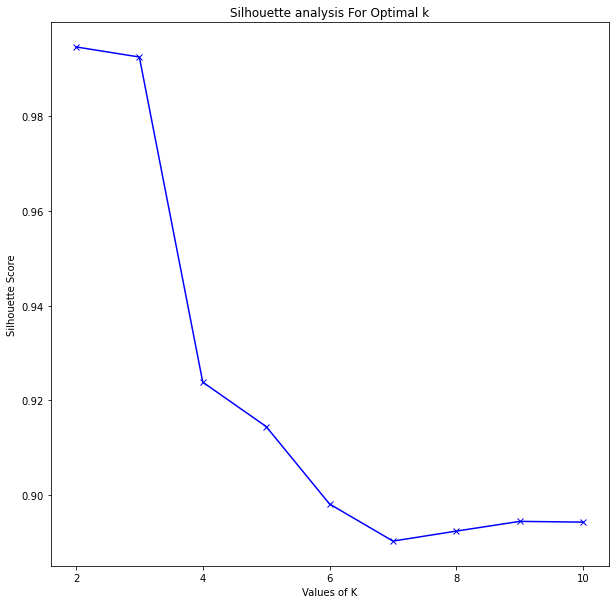

In [68]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_avg = []
kmax = 10
for k in range(2, kmax+1):
    # initialise kmeans
    kmeans = KMeans(n_clusters=k, random_state = rng)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)   
plt.plot(list(range(2, kmax+1)),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.xticks(range(2, kmax+1, 2))
plt.title('Silhouette analysis For Optimal k')
plt.show()

#### Elbow Method

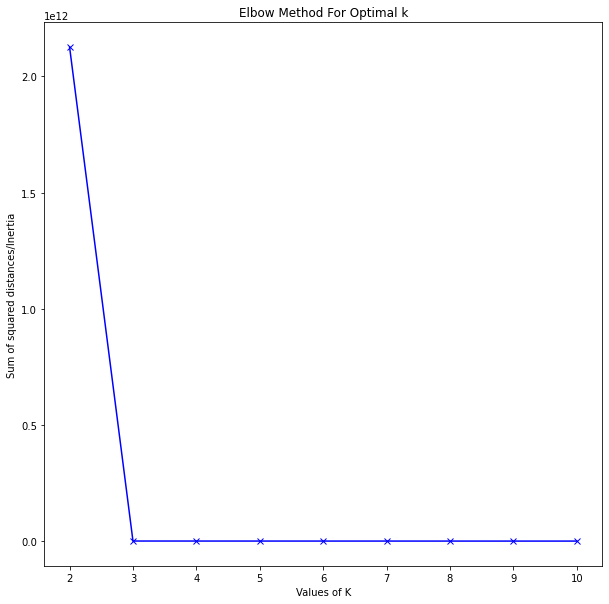

In [69]:
Sum_of_squared_distances = []
K = range(2,11)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.xticks(range(2, 11, 1))
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
clustering = KMeans(n_clusters=3, random_state=rng)
clustering.fit(X)
labels = clustering.labels_
ml_df['cluster_labels'] = labels

In [71]:
ml_df.to_csv('ml_df_kmeans_clustering_results.csv')

In [72]:
uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 0


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                4  ...             3             0.0              4   
1                4  ...             3             0.0              4   
2                4  ...             3             0.0              4   
3                4  ...             3             0.0              4   
4                4  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
327              4  ...             4             NaN              5   
328              4  ...             4             NaN              5   
329              4  ...             4             NaN              5   
330              4  ...             4             NaN              5   
331              4  ...             4             NaN              5   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             3             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
327             NaN                NaN             4             NaN   
328             NaN                NaN             4             NaN   
329             NaN                NaN             4             NaN   
330             NaN                NaN             4             NaN   
331             NaN                NaN             4             NaN   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0               0  
1                4             0.0               0  
2                4             0.0               0  
3                4             0.0               0  
4                4             0.0               0  
..             ...             ...             ...  
327              5             NaN               0  
328              5             NaN  


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
298    7.35               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
298             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
298              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
298             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
298              4             0.0               1  

[1 rows x 1822 columns]


Cluster 2


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
9      1.30               0.0              4             0.0              3   
10     1.31               0.0              4             0.0              3   
11     1.32               0.0              4             0.0              3   
12     1.33               0.0              4             0.0              3   
13     1.34               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
312    7.49                 0              4               0              3   
313    7.50                 0              4               0              3   
314    7.51                 0              4               0              3   
315    7.52                 0              4               0              3   
316    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
9               0.0               0.0              3             0.0   
10              0.0               0.0              3             0.0   
11              0.0               0.0              3             0.0   
12              0.0               0.0              3             0.0   
13              0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
312               0                 0              3               0   
313               0                 0              3               0   
314               0                 0              3               0   
315               0                 0              3               0   
316             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
9                3  ...             3             0.0              4   
10               3  ...             3             0.0              4   
11               3  ...             3             0.0              4   
12               3  ...             3             0.0              4   
13               3  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
312              3  ...             3               0              4   
313              3  ...             3               0              4   
314              3  ...             3               0              4   
315              3  ...             3               0              4   
316              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
9               0.0                0.0             3             0.0   
10              0.0         -23.808136             2           -15.5   
11              0.0                0.0             3             0.0   
12              0.0                0.0             3             0.0   
13              0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
312               0                  0             3               0   
313               0                  0             3               0   
314               0                  0             3               0   
315               0                  0             3               0   
316             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
9                4             0.0               2  
10               2            -0.6               2  
11               4             0.0               2  
12               4             0.0               2  
13               4             0.0               2  
..             ...             ...             ...  
312              4               0               2  
313              4               0  

In [73]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### Agglomerative Clustering

In [74]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(X)
ml_df['cluster_labels'] = labels

In [75]:
ml_df.to_csv('ml_df_agglomerative_clustering_results.csv')

In [76]:
uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 0


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
9      1.30               0.0              4             0.0              3   
10     1.31               0.0              4             0.0              3   
11     1.32               0.0              4             0.0              3   
12     1.33               0.0              4             0.0              3   
13     1.34               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
312    7.49                 0              4               0              3   
313    7.50                 0              4               0              3   
314    7.51                 0              4               0              3   
315    7.52                 0              4               0              3   
316    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
9               0.0               0.0              3             0.0   
10              0.0               0.0              3             0.0   
11              0.0               0.0              3             0.0   
12              0.0               0.0              3             0.0   
13              0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
312               0                 0              3               0   
313               0                 0              3               0   
314               0                 0              3               0   
315               0                 0              3               0   
316             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
9                3  ...             3             0.0              4   
10               3  ...             3             0.0              4   
11               3  ...             3             0.0              4   
12               3  ...             3             0.0              4   
13               3  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
312              3  ...             3               0              4   
313              3  ...             3               0              4   
314              3  ...             3               0              4   
315              3  ...             3               0              4   
316              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
9               0.0                0.0             3             0.0   
10              0.0         -23.808136             2           -15.5   
11              0.0                0.0             3             0.0   
12              0.0                0.0             3             0.0   
13              0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
312               0                  0             3               0   
313               0                  0             3               0   
314               0                  0             3               0   
315               0                  0             3               0   
316             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
9                4             0.0               0  
10               2            -0.6               0  
11               4             0.0               0  
12               4             0.0               0  
13               4             0.0               0  
..             ...             ...             ...  
312              4               0               0  
313              4               0  


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
298    7.35               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
298             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
298              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
298             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
298              4             0.0               1  

[1 rows x 1822 columns]


Cluster 2


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                4  ...             3             0.0              4   
1                4  ...             3             0.0              4   
2                4  ...             3             0.0              4   
3                4  ...             3             0.0              4   
4                4  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
327              4  ...             4             NaN              5   
328              4  ...             4             NaN              5   
329              4  ...             4             NaN              5   
330              4  ...             4             NaN              5   
331              4  ...             4             NaN              5   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             3             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
327             NaN                NaN             4             NaN   
328             NaN                NaN             4             NaN   
329             NaN                NaN             4             NaN   
330             NaN                NaN             4             NaN   
331             NaN                NaN             4             NaN   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0               2  
1                4             0.0               2  
2                4             0.0               2  
3                4             0.0               2  
4                4             0.0               2  
..             ...             ...             ...  
327              5             NaN               2  
328              5             NaN  

In [77]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

### Gaussian Mixture Model

In [78]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
labels = gmm.fit_predict(X)

In [79]:
ml_df['cluster_labels'] = labels

In [80]:
uniq_labels = list(ml_df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(ml_df.loc[ml_df['cluster_labels'] == i])


Cluster 0


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
0      1.21               NaN              5             NaN              4   
1      1.22               NaN              5             NaN              4   
2      1.23               NaN              5             NaN              4   
3      1.24               NaN              5             NaN              4   
4      1.25               NaN              5             NaN              4   
..      ...               ...            ...             ...            ...   
327    7.64               NaN              5             NaN              4   
328    7.65               NaN              5             NaN              4   
329    7.66               NaN              5             NaN              4   
330    7.67               NaN              5             NaN              4   
331    7.68               NaN              5             NaN              4   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
0               NaN               NaN              4             NaN   
1               NaN               NaN              4             NaN   
2               NaN               NaN              4             NaN   
3               NaN               NaN              4             NaN   
4               NaN               NaN              4             NaN   
..              ...               ...            ...             ...   
327             NaN               NaN              4             NaN   
328             NaN               NaN              4             NaN   
329             NaN               NaN              4             NaN   
330             NaN               NaN              4             NaN   
331             NaN               NaN              4             NaN   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
0                4  ...             3             0.0              4   
1                4  ...             3             0.0              4   
2                4  ...             3             0.0              4   
3                4  ...             3             0.0              4   
4                4  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
327              4  ...             4             NaN              5   
328              4  ...             4             NaN              5   
329              4  ...             4             NaN              5   
330              4  ...             4             NaN              5   
331              4  ...             4             NaN              5   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
0               0.0                0.0             3             0.0   
1               0.0                0.0             3             0.0   
2               0.0                0.0             3             0.0   
3               0.0                0.0             3             0.0   
4               0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
327             NaN                NaN             4             NaN   
328             NaN                NaN             4             NaN   
329             NaN                NaN             4             NaN   
330             NaN                NaN             4             NaN   
331             NaN                NaN             4             NaN   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
0                4             0.0               0  
1                4             0.0               0  
2                4             0.0               0  
3                4             0.0               0  
4                4             0.0               0  
..             ...             ...             ...  
327              5             NaN               0  
328              5             NaN  


Cluster 1


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
298    7.35               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
298             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
298              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
298             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
298              4             0.0               1  

[1 rows x 1822 columns]


Cluster 2


residue 7EW2_intenergysum  7EW2_inttype1 7EW2_intenergy1  7EW2_inttype2  \
9      1.30               0.0              4             0.0              3   
10     1.31               0.0              4             0.0              3   
11     1.32               0.0              4             0.0              3   
12     1.33               0.0              4             0.0              3   
13     1.34               0.0              4             0.0              3   
..      ...               ...            ...             ...            ...   
312    7.49                 0              4               0              3   
313    7.50                 0              4               0              3   
314    7.51                 0              4               0              3   
315    7.52                 0              4               0              3   
316    7.53               0.0              4             0.0              3   

    7EW2_intenergy2 7EW3_intenergysum  7EW3_inttype1 7EW3_intenergy1  \
9               0.0               0.0              3             0.0   
10              0.0               0.0              3             0.0   
11              0.0               0.0              3             0.0   
12              0.0               0.0              3             0.0   
13              0.0               0.0              3             0.0   
..              ...               ...            ...             ...   
312               0                 0              3               0   
313               0                 0              3               0   
314               0                 0              3               0   
315               0                 0              3               0   
316             0.0               0.0              3             0.0   

     7EW3_inttype2  ... 6Z10_inttype1 6Z10_intenergy1  6Z10_inttype2  \
9                3  ...             3             0.0              4   
10               3  ...             3             0.0              4   
11               3  ...             3             0.0              4   
12               3  ...             3             0.0              4   
13               3  ...             3             0.0              4   
..             ...  ...           ...             ...            ...   
312              3  ...             3               0              4   
313              3  ...             3               0              4   
314              3  ...             3               0              4   
315              3  ...             3               0              4   
316              3  ...             3             0.0              4   

    6Z10_intenergy2  6RNK_intenergysum 6RNK_inttype1 6RNK_intenergy1  \
9               0.0                0.0             3             0.0   
10              0.0         -23.808136             2           -15.5   
11              0.0                0.0             3             0.0   
12              0.0                0.0             3             0.0   
13              0.0                0.0             3             0.0   
..              ...                ...           ...             ...   
312               0                  0             3               0   
313               0                  0             3               0   
314               0                  0             3               0   
315               0                  0             3               0   
316             0.0                0.0             3             0.0   

     6RNK_inttype2 6RNK_intenergy2  cluster_labels  
9                4             0.0               2  
10               2            -0.6               2  
11               4             0.0               2  
12               4             0.0               2  
13               4             0.0               2  
..             ...             ...             ...  
312              4               0               2  
313              4               0  

## TSNE (3 clusters)

In [81]:
plotX = X.copy()

#plotly imports
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#T-SNE with two principal components
TSNE_2d = TSNE(n_components=2, init='random')

clusters = ml_df['cluster_labels']
PCs_2d = pd.DataFrame(TSNE_2d.fit_transform(plotX))
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plotX['clusters'] = clusters
plotX['PC1_2d'] = PCs_2d['PC1_2d']
plotX['PC2_2d'] = PCs_2d['PC2_2d']

uniq_clusters = plotX['clusters'].unique()
uniqs = uniq_clusters.tolist()
uniqs.sort()

cluster0 = plotX[plotX['clusters'] == 0]
cluster1 = plotX[plotX['clusters'] == 1]
cluster2 = plotX[plotX['clusters'] == 2]

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster I",
                    marker = dict(color = 'rgba(228,26,28,0.8)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster II",
                    marker = dict(color = 'rgba(43, 89, 39, 0.98)', size = 10, line=dict(width=1,color='Black')),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster III",
                    marker = dict(color = 'rgba(20, 15, 71, 1)', size = 10, line=dict(width=1,color='Black')),
                    text = None)


data = [trace1, trace2, trace3]

layout = dict(xaxis= dict(title= 'Dimension 1',zeroline= False),
              yaxis= dict(title= 'Dimension 2',zeroline= False),
              font_family="Arial",
              font = dict(size=16),
              width=800,
              height=800
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# CLUSTERING BY STRUCTURE

In [131]:
df = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')
df.drop('index', axis = 1, inplace=True)
structure_df = df.copy()

In [132]:
# encode interaction types as integers

# create instance of labelencoder
labelencoder = LabelEncoder()

# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'type' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])


# encode states as integers
# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'State' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])

# encode functions as integers
# get columns with 'type' in their name
cols = [col for col in structure_df.columns if 'Function' in col]

# loop though all columns and convert strings to categorical integer variables
for col in cols:
    structure_df[col] = labelencoder.fit_transform(structure_df[col])

In [133]:
structure_df.columns

Index(['PDBID', 'State', 'Function', '1.21_intenergysum', '1.21_inttype1',
       '1.21_intenergy1', '1.21_inttype2', '1.21_intenergy2',
       '1.22_intenergysum', '1.22_inttype1',
       ...
       '7.67_intenergysum', '7.67_inttype1', '7.67_intenergy1',
       '7.67_inttype2', '7.67_intenergy2', '7.68_intenergysum',
       '7.68_inttype1', '7.68_intenergy1', '7.68_inttype2', '7.68_intenergy2'],
      dtype='object', length=1663)

In [134]:
structure_df

PDBID  State  Function  1.21_intenergysum  1.21_inttype1  1.21_intenergy1  \
0    7EW2      0         0                NaN              1              NaN   
1    7EW3      0         0                NaN              1              NaN   
2    7EW4      0         0                NaN              1              NaN   
3    7EW1      0         0                NaN              1              NaN   
4    7LD4      0         0                NaN              1              NaN   
..    ...    ...       ...                ...            ...              ...   
359  5C1M      0         0                NaN              1              NaN   
360  4EJ4      1         2                NaN              1              NaN   
361  4DKL      1         2                NaN              1              NaN   
362  6Z10      2         2                0.0              0              0.0   
363  6RNK      2         2                0.0              0              0.0   

     1.21_inttype2  1.21_intenergy2  1.22_intenergysum  1.22_inttype1  ...  \
0                1              NaN                NaN              1  ...   
1                1              NaN                NaN              1  ...   
2                1              NaN                NaN              1  ...   
3                1              NaN                NaN              1  ...   
4                1              NaN                NaN              1  ...   
..             ...              ...                ...            ...  ...   
359              1              NaN                NaN              1  ...   
360              1              NaN                NaN              1  ...   
361              1              NaN                NaN              1  ...   
362              0              0.0                0.0              0  ...   
363              0              0.0                0.0              0  ...   

     7.67_intenergysum  7.67_inttype1  7.67_intenergy1  7.67_inttype2  \
0                  NaN              1              NaN              1   
1                  NaN              1              NaN              1   
2                  NaN              1              NaN              1   
3                  NaN              1              NaN              1   
4                  NaN              1              NaN              1   
..                 ...            ...              ...            ...   
359                NaN              1              NaN              1   
360                NaN              1              NaN              1   
361                NaN              1              NaN              1   
362                NaN              1              NaN              1   
363                NaN              1              NaN              1   

     7.67_intenergy2  7.68_intenergysum  7.68_inttype1  7.68_intenergy1  \
0                NaN                NaN              1              NaN   
1                NaN                NaN              1              NaN   
2                NaN                NaN              1              NaN   
3                NaN                NaN              1              NaN   
4                NaN                NaN              1              NaN   
..               ...                ...            ...              ...   
359              NaN                NaN              1              NaN   
360              NaN                NaN              1              NaN   
361              NaN                NaN              1              NaN   
362              NaN                NaN              1              NaN   
363              NaN                NaN              1              NaN   

     7.68_inttype2  7.68_intenergy2  
0                1              NaN  
1                1              NaN  
2                1              NaN  
3                1              NaN  
4                1              NaN  
..             ...              ...  
359              1              NaN  
360         

In [135]:
X = structure_df.drop(['PDBID'], axis = 1)
y = structure_df['PDBID']
display(X)

State  Function  1.21_intenergysum  1.21_inttype1  1.21_intenergy1  \
0        0         0                NaN              1              NaN   
1        0         0                NaN              1              NaN   
2        0         0                NaN              1              NaN   
3        0         0                NaN              1              NaN   
4        0         0                NaN              1              NaN   
..     ...       ...                ...            ...              ...   
359      0         0                NaN              1              NaN   
360      1         2                NaN              1              NaN   
361      1         2                NaN              1              NaN   
362      2         2                0.0              0              0.0   
363      2         2                0.0              0              0.0   

     1.21_inttype2  1.21_intenergy2  1.22_intenergysum  1.22_inttype1  \
0                1              NaN                NaN              1   
1                1              NaN                NaN              1   
2                1              NaN                NaN              1   
3                1              NaN                NaN              1   
4                1              NaN                NaN              1   
..             ...              ...                ...            ...   
359              1              NaN                NaN              1   
360              1              NaN                NaN              1   
361              1              NaN                NaN              1   
362              0              0.0                0.0              0   
363              0              0.0                0.0              0   

     1.22_intenergy1  ...  7.67_intenergysum  7.67_inttype1  7.67_intenergy1  \
0                NaN  ...                NaN              1              NaN   
1                NaN  ...                NaN              1              NaN   
2                NaN  ...                NaN              1              NaN   
3                NaN  ...                NaN              1              NaN   
4                NaN  ...                NaN              1              NaN   
..               ...  ...                ...            ...              ...   
359              NaN  ...                NaN              1              NaN   
360              NaN  ...                NaN              1              NaN   
361              NaN  ...                NaN              1              NaN   
362              0.0  ...                NaN              1              NaN   
363              0.0  ...                NaN              1              NaN   

     7.67_inttype2  7.67_intenergy2  7.68_intenergysum  7.68_inttype1  \
0                1              NaN                NaN              1   
1                1              NaN                NaN              1   
2                1              NaN                NaN              1   
3                1              NaN                NaN              1   
4                1              NaN                NaN              1   
..             ...              ...                ...            ...   
359              1              NaN                NaN              1   
360              1              NaN                NaN              1   
361              1              NaN                NaN              1   
362              1              NaN                NaN              1   
363              1              NaN                NaN              1   

     7.68_intenergy1  7.68_inttype2  7.68_intenergy2  
0                NaN              1              NaN  
1                NaN              1              NaN  
2                NaN              1              NaN  
3                NaN              1              NaN  
4                NaN              1              NaN  
..               ...            ...              ...  
359 

In [136]:
# get colnames
colnames = list(X.columns)

# impute data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = pd.DataFrame(my_imputer.fit_transform(X))

# scale data
scaler = StandardScaler()
to_scale = [col for col in X.columns.values]
scaler.fit(X[to_scale])
X[to_scale] = scaler.transform(X[to_scale])

# predict z-scores on the test set
X[to_scale] = scaler.transform(X[to_scale]) 

# #rename columns
X.columns = colnames

# display scaled values
display(X)

State  Function  1.21_intenergysum  1.21_inttype1  1.21_intenergy1  \
0   -3.330947 -2.257864                0.0      -9.961345              0.0   
1   -3.330947 -2.257864                0.0      -9.961345              0.0   
2   -3.330947 -2.257864                0.0      -9.961345              0.0   
3   -3.330947 -2.257864                0.0      -9.961345              0.0   
4   -3.330947 -2.257864                0.0      -9.961345              0.0   
..        ...       ...                ...            ...              ...   
359 -3.330947 -2.257864                0.0      -9.961345              0.0   
360 -0.568081 -0.460223                0.0      -9.961345              0.0   
361 -0.568081 -0.460223                0.0      -9.961345              0.0   
362  2.194785 -0.460223                0.0    -132.302988              0.0   
363  2.194785 -0.460223                0.0    -132.302988              0.0   

     1.21_inttype2  1.21_intenergy2  1.22_intenergysum  1.22_inttype1  \
0        -9.961345              0.0                0.0      -9.961345   
1        -9.961345              0.0                0.0      -9.961345   
2        -9.961345              0.0                0.0      -9.961345   
3        -9.961345              0.0                0.0      -9.961345   
4        -9.961345              0.0                0.0      -9.961345   
..             ...              ...                ...            ...   
359      -9.961345              0.0                0.0      -9.961345   
360      -9.961345              0.0                0.0      -9.961345   
361      -9.961345              0.0                0.0      -9.961345   
362    -132.302988              0.0                0.0    -132.302988   
363    -132.302988              0.0                0.0    -132.302988   

     1.22_intenergy1  ...  7.67_intenergysum  7.67_inttype1  7.67_intenergy1  \
0                0.0  ...                0.0       -6.70766              0.0   
1                0.0  ...                0.0       -6.70766              0.0   
2                0.0  ...                0.0       -6.70766              0.0   
3                0.0  ...                0.0       -6.70766              0.0   
4                0.0  ...                0.0       -6.70766              0.0   
..               ...  ...                ...            ...              ...   
359              0.0  ...                0.0       -6.70766              0.0   
360              0.0  ...                0.0       -6.70766              0.0   
361              0.0  ...                0.0       -6.70766              0.0   
362              0.0  ...                0.0       -6.70766              0.0   
363              0.0  ...                0.0       -6.70766              0.0   

     7.67_inttype2  7.67_intenergy2  7.68_intenergysum  7.68_inttype1  \
0         -6.70766              0.0                0.0       -6.70766   
1         -6.70766              0.0                0.0       -6.70766   
2         -6.70766              0.0                0.0       -6.70766   
3         -6.70766              0.0                0.0       -6.70766   
4         -6.70766              0.0                0.0       -6.70766   
..             ...              ...                ...            ...   
359       -6.70766              0.0                0.0       -6.70766   
360       -6.70766              0.0                0.0       -6.70766   
361       -6.70766              0.0                0.0       -6.70766   
362       -6.70766              0.0                0.0       -6.70766   
363       -6.70766              0.0                0.0       -6.70766   

     7.68_intenergy1  7.68_inttype2  7.68_intenergy2  
0                0.0       -6.70766              0.0  
1                0.0       -6.70766              0.0  
2                0.0       -6.70766              0.0  
3                0.0       -6.70766              0.0  
4                0.0       -6.70766              0.0  
..               ...      

### Mean Shift Clustering

In [137]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

ms = MeanShift(bandwidth = bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
 
# Print the number of clusters in the data
print("Clusters found: %d" % n_clusters_)

Clusters found: 62


In [138]:
df['cluster_labels'] = labels

In [139]:
# display structures in each cluster
uniq_labels = list(df['cluster_labels'].unique())
uniq_labels.sort()

for i in uniq_labels:
    print('\nCluster', i)
    display(df.loc[df['cluster_labels'] == i])
    print(df.loc[df['cluster_labels'] == i]['State'].value_counts(), '\n')
    print(df.loc[df['cluster_labels'] == i]['Function'].value_counts())


Cluster 0


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
0    7EW2        Active     Agonist                NaN           NaN   
1    7EW3        Active     Agonist                NaN           NaN   
2    7EW4        Active     Agonist                NaN           NaN   
3    7EW1        Active     Agonist                NaN           NaN   
4    7LD4        Active     Agonist                NaN           NaN   
..    ...           ...         ...                ...           ...   
359  5C1M        Active     Agonist                NaN           NaN   
360  4EJ4      Inactive  Antagonist                NaN           NaN   
361  4DKL      Inactive  Antagonist                NaN           NaN   
362  6Z10  Intermediate  Antagonist                0.0          None   
363  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
0                NaN           NaN              NaN                NaN   
1                NaN           NaN              NaN                NaN   
2                NaN           NaN              NaN                NaN   
3                NaN           NaN              NaN                NaN   
4                NaN           NaN              NaN                NaN   
..               ...           ...              ...                ...   
359              NaN           NaN              NaN                NaN   
360              NaN           NaN              NaN                NaN   
361              NaN           NaN              NaN                NaN   
362              0.0          None              0.0                0.0   
363              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
0             NaN  ...            NaN             NaN            NaN   
1             NaN  ...            NaN             NaN            NaN   
2             NaN  ...            NaN             NaN            NaN   
3             NaN  ...            NaN             NaN            NaN   
4             NaN  ...            NaN             NaN            NaN   
..            ...  ...            ...             ...            ...   
359           NaN  ...            NaN             NaN            NaN   
360           NaN  ...            NaN             NaN            NaN   
361           NaN  ...            NaN             NaN            NaN   
362          None  ...            NaN             NaN            NaN   
363          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
0                NaN               NaN            NaN             NaN   
1                NaN               NaN            NaN             NaN   
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
4                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
359              NaN               NaN            NaN             NaN   
360              NaN               NaN            NaN             NaN   
361              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
0              NaN              NaN              0  
1              NaN              NaN              0  
2              NaN              NaN              0  
3              NaN              NaN              0  
4              NaN              NaN              0  
..             ...              ...            ...  
359            NaN              NaN              0  
360            NaN              NaN              0  
361            NaN             

Inactive        184
Active           97
Intermediate     17
Other             1
Name: State, dtype: int64 

Antagonist           153
Agonist              120
Inverse agonist       19
Agonist (partial)      7
Name: Function, dtype: int64

Cluster 1


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
137  5YHL  Inactive  Antagonist                NaN           NaN   
138  5YWY  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
137              NaN           NaN              NaN                NaN   
138              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
137           NaN  ...            NaN             NaN            NaN   
138           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
137              NaN               NaN            NaN             NaN   
138              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
137            NaN              NaN              1  
138            NaN              NaN              1  

[2 rows x 1664 columns]

Inactive    2
Name: State, dtype: int64 

Antagonist    2
Name: Function, dtype: int64

Cluster 2


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
64   6LUQ  Inactive  Antagonist                NaN           NaN   
124  6A93  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
64               NaN           NaN              NaN                NaN   
124              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
64            NaN  ...            NaN             NaN            NaN   
124           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
64               NaN               NaN            NaN             NaN   
124              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
64             NaN              NaN              2  
124            NaN              NaN              2  

[2 rows x 1664 columns]

Inactive    2
Name: State, dtype: int64 

Antagonist    2
Name: Function, dtype: int64

Cluster 3


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
10  7C4S    Active     Agonist                NaN           NaN   
34  7DFP  Inactive  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
10              NaN           NaN              NaN                NaN   
34              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
10           NaN  ...            NaN             NaN            NaN   
34           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
10              NaN               NaN            NaN             NaN   
34              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
10            NaN              NaN              3  
34            NaN              NaN              3  

[2 rows x 1664 columns]

Active      1
Inactive    1
Name: State, dtype: int64 

Agonist       1
Antagonist    1
Name: Function, dtype: int64

Cluster 4


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
230  4UG2  Active  Agonist                NaN           NaN              NaN   
283  7VUH  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
230           NaN              NaN                NaN           NaN  ...   
283           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
230            NaN             NaN            NaN              NaN   
283           None             0.0           None              0.0   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
230               NaN            NaN             NaN            NaN   
283               0.0           None             0.0           None   

     7.68_intenergy2 cluster_labels  
230              NaN              4  
283              0.0              4  

[2 rows x 1664 columns]

Active    2
Name: State, dtype: int64 

Agonist    2
Name: Function, dtype: int64

Cluster 5


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
133  6IIV  Intermediate  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
133              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
133           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
133              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
133            NaN              NaN              5  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 6


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
132  6IIU  Intermediate  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
132              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
132           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
132              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
132            NaN              NaN              6  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 7


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
248  3VW7  Intermediate  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
248              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
248           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
248              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
248            NaN              NaN              7  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 8


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
231  4XNW  Intermediate  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
231              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
231           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
231              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
231            NaN              NaN              8  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 9


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
237  4NTJ  Intermediate  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
237              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
237           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
237              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
237            NaN              NaN              9  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 10


PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
106  6RZ4  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
106              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
106          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
106              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
106            NaN              NaN             10  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 11


PDBID         State           Function  1.21_intenergysum 1.21_inttype1  \
235  4PY0  Intermediate  Agonist (partial)                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
235              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
235           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
235              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
235            NaN              NaN             11  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist (partial)    1
Name: Function, dtype: int64

Cluster 12


PDBID         State           Function  1.21_intenergysum 1.21_inttype1  \
354  6ZA8  Intermediate  Agonist (partial)                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
354              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
354           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
354              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
354            NaN              NaN             12  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist (partial)    1
Name: Function, dtype: int64

Cluster 13


PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
236  4PXZ  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
236              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
236           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
236              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
236            NaN              NaN             13  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 14


PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
66  6LI0  Intermediate  Agonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
66              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
66           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
66              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
66            NaN              NaN             14  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 15


PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
192  5TZR  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
192              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
192           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
192              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
192            NaN              NaN             15  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 16


PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
234  4PHU  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
234              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
234           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
234              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
234            NaN              NaN             16  

[1 rows x 1664 columns]

Intermediate    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 17


PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
85  6OL9  Inactive  Inverse agonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
85              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
85           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
85              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
85            NaN              NaN             17  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Inverse agonist    1
Name: Function, dtype: int64

Cluster 18


PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
350  6Z4S  Inactive  Inverse agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
350              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
350           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
350              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
350            NaN              NaN             18  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Inverse agonist    1
Name: Function, dtype: int64

Cluster 19


PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
202  5U09  Inactive  Inverse agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
202              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
202           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
202              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
202            NaN              NaN             19  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Inverse agonist    1
Name: Function, dtype: int64

Cluster 20


PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
108  6K1Q  Inactive  Inverse agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
108              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
108           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
108              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
108            NaN              NaN             20  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Inverse agonist    1
Name: Function, dtype: int64

Cluster 21


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
216  5DSG  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
216              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
216           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
216              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
216            NaN              NaN             21  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 22


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
227  4Z35  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
227              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
227           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
227              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
227            NaN              NaN             22  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 23


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
175  5O9H  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
175              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
175           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
175              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
175            NaN              NaN             23  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 24


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
46  7BR3  Inactive  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
46              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
46           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
46              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
46            NaN              NaN             24  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 25


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
200  5UIG  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
200              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
200           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
200              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
200            NaN              NaN             25  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 26


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
264  3RZE  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
264              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
264           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
264              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
264            NaN              NaN             26  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 27


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
134  6E59  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
134              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
134           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
134              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
134            NaN              NaN             27  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 28


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
262  3REY  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
262              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
262           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
262              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
262            NaN              NaN             28  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 29


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
63  6VI4  Inactive  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
63              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
63           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
63              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
63            NaN              NaN             29  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 30


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
347  6IQL  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
347              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
347           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
347              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
347            NaN              NaN             30  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 31


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
338  2YCX  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
338              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
338           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
338              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
338            NaN              NaN             31  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 32


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
158  5ZBQ  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
158              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
158           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
158              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
158            NaN              NaN             32  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 33


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
56  7C61  Inactive  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
56              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
56           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
56              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
56            NaN              NaN             33  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 34


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
348  5X33  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
348              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
348           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
348              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
348            NaN              NaN             34  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 35


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
130  6GPS  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
130              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
130           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
130              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
130            NaN              NaN             35  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 36


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
131  6GPX  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
131              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
131           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
131              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
131            NaN              NaN             36  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 37


PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
184  5X93  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
184              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
184           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
184              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
184            NaN              NaN             37  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 38


PDBID     State           Function  1.21_intenergysum 1.21_inttype1  \
281  7VOE  Inactive  Agonist (partial)                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
281              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
281           NaN  ...           None             0.0           None   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
281              0.0               0.0           None             0.0   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
281           None              0.0             38  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Agonist (partial)    1
Name: Function, dtype: int64

Cluster 39


PDBID     State Function  1.21_intenergysum 1.21_inttype1  \
300  6ZFZ  Inactive  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
300              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
300           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
300              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
300            NaN              NaN             39  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 40


PDBID     State Function  1.21_intenergysum 1.21_inttype1  \
353  6YVR  Inactive  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
353              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
353           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
353              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
353            NaN              NaN             40  

[1 rows x 1664 columns]

Inactive    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 41


PDBID   State    Function  1.21_intenergysum 1.21_inttype1  \
197  5UNG  Active  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
197              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
197           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
197              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
197            NaN              NaN             41  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 42


PDBID   State    Function  1.21_intenergysum 1.21_inttype1  \
198  5UNF  Active  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
198              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
198           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
198              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
198            NaN              NaN             42  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Antagonist    1
Name: Function, dtype: int64

Cluster 43


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
296  7VV6  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
296           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
296            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
296               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
296              NaN             43  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 44


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
287  7VDH  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
287           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
287            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
287               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
287              NaN             44  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 45


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
297  7S8N  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
297           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
297            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
297               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
297              NaN             45  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 46


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
292  7VV0  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
292           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
292            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
292               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
292              NaN             46  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 47


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
288  7VDL  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
288           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
288            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
288               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
288              NaN             47  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 48


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
291  7VUZ  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
291           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
291            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
291               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
291              NaN             48  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 49


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
286  7VUG  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
286           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
286           None             0.0           None              0.0   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
286               0.0           None             0.0           None   

     7.68_intenergy2 cluster_labels  
286              0.0             49  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 50


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
8  7DB6  Active  Agonist                NaN           NaN              NaN   

  1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
8           NaN              NaN                NaN           NaN  ...   

   7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
8            NaN             NaN            NaN              NaN   

  7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
8               NaN            NaN             NaN            NaN   

   7.68_intenergy2 cluster_labels  
8              NaN             50  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 51


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
111  6OIJ  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
111           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
111            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
111               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
111              NaN             51  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 52


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
173  6B73  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
173           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
173            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
173               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
173              NaN             52  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 53


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
11  7CX3  Active  Agonist                NaN           NaN              NaN   

   1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
11           NaN              NaN                NaN           NaN  ...   

    7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
11            NaN             NaN            NaN              NaN   

   7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
11               NaN            NaN             NaN            NaN   

    7.68_intenergy2 cluster_labels  
11              NaN             53  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 54


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
136  6M9T  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
136           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
136            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
136               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
136              NaN             54  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 55


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
13  7CX4  Active  Agonist                NaN           NaN              NaN   

   1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
13           NaN              NaN                NaN           NaN  ...   

    7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
13            NaN             NaN            NaN              NaN   

   7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
13               NaN            NaN             NaN            NaN   

    7.68_intenergy2 cluster_labels  
13              NaN             55  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 56


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
309  7FIH  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
309           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
309            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
309               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
309              NaN             56  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 57


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
90  6PT3  Active  Agonist                NaN           NaN              NaN   

   1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
90           NaN              NaN                NaN           NaN  ...   

    7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
90            NaN             NaN            NaN              NaN   

   7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
90               NaN            NaN             NaN            NaN   

    7.68_intenergy2 cluster_labels  
90              NaN             57  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 58


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
314  7P02  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
314           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
314            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
314               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
314              NaN             58  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 59


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
315  7P00  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
315           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
315            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
315               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
315              NaN             59  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 60


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
358  4GRV  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
358           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
358            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
358               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
358              NaN             60  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64

Cluster 61


PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
242  4LDL  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
242           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
242            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
242               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
242              NaN             61  

[1 rows x 1664 columns]

Active    1
Name: State, dtype: int64 

Agonist    1
Name: Function, dtype: int64


#### Plotting Heatmap Sorted by Mean Shift Clustering Results

In [140]:
import pickle

# get protein names from pickled file
with open('pickles/protein_names.pkl', "rb") as f:
    protein_names = pickle.load(f)    

# assign variable containing PDB IDs for all structures
PDBids = y

# assign variable with states for all structures
states = df['State']

In [141]:
# generate name/state/function labels
protein_NSF = []
for i in range(len(df)):
    name = protein_names[i]
    state = df.iloc[i, 1]
    function = df.iloc[i, 2]
    NSF = name + ' (' + state + ', ' + function + ')'
    protein_NSF.append(NSF)

In [142]:
# generate name/PDBID labels
protein_NPDB = []
for i in range(len(df)):
    name = protein_names[i]
    PDB = PDBids[i]
    NPDB = name + ' (' + PDB + ')'
    protein_NPDB.append(NPDB)

In [143]:
# determine where to place row lines
uniqs = np.unique(ms.labels_, return_counts=True)
line_count = 0
row_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    row_line_markers.append(line_count)
    #print(line_count)
    
print(row_line_markers)

[299, 301, 303, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364]


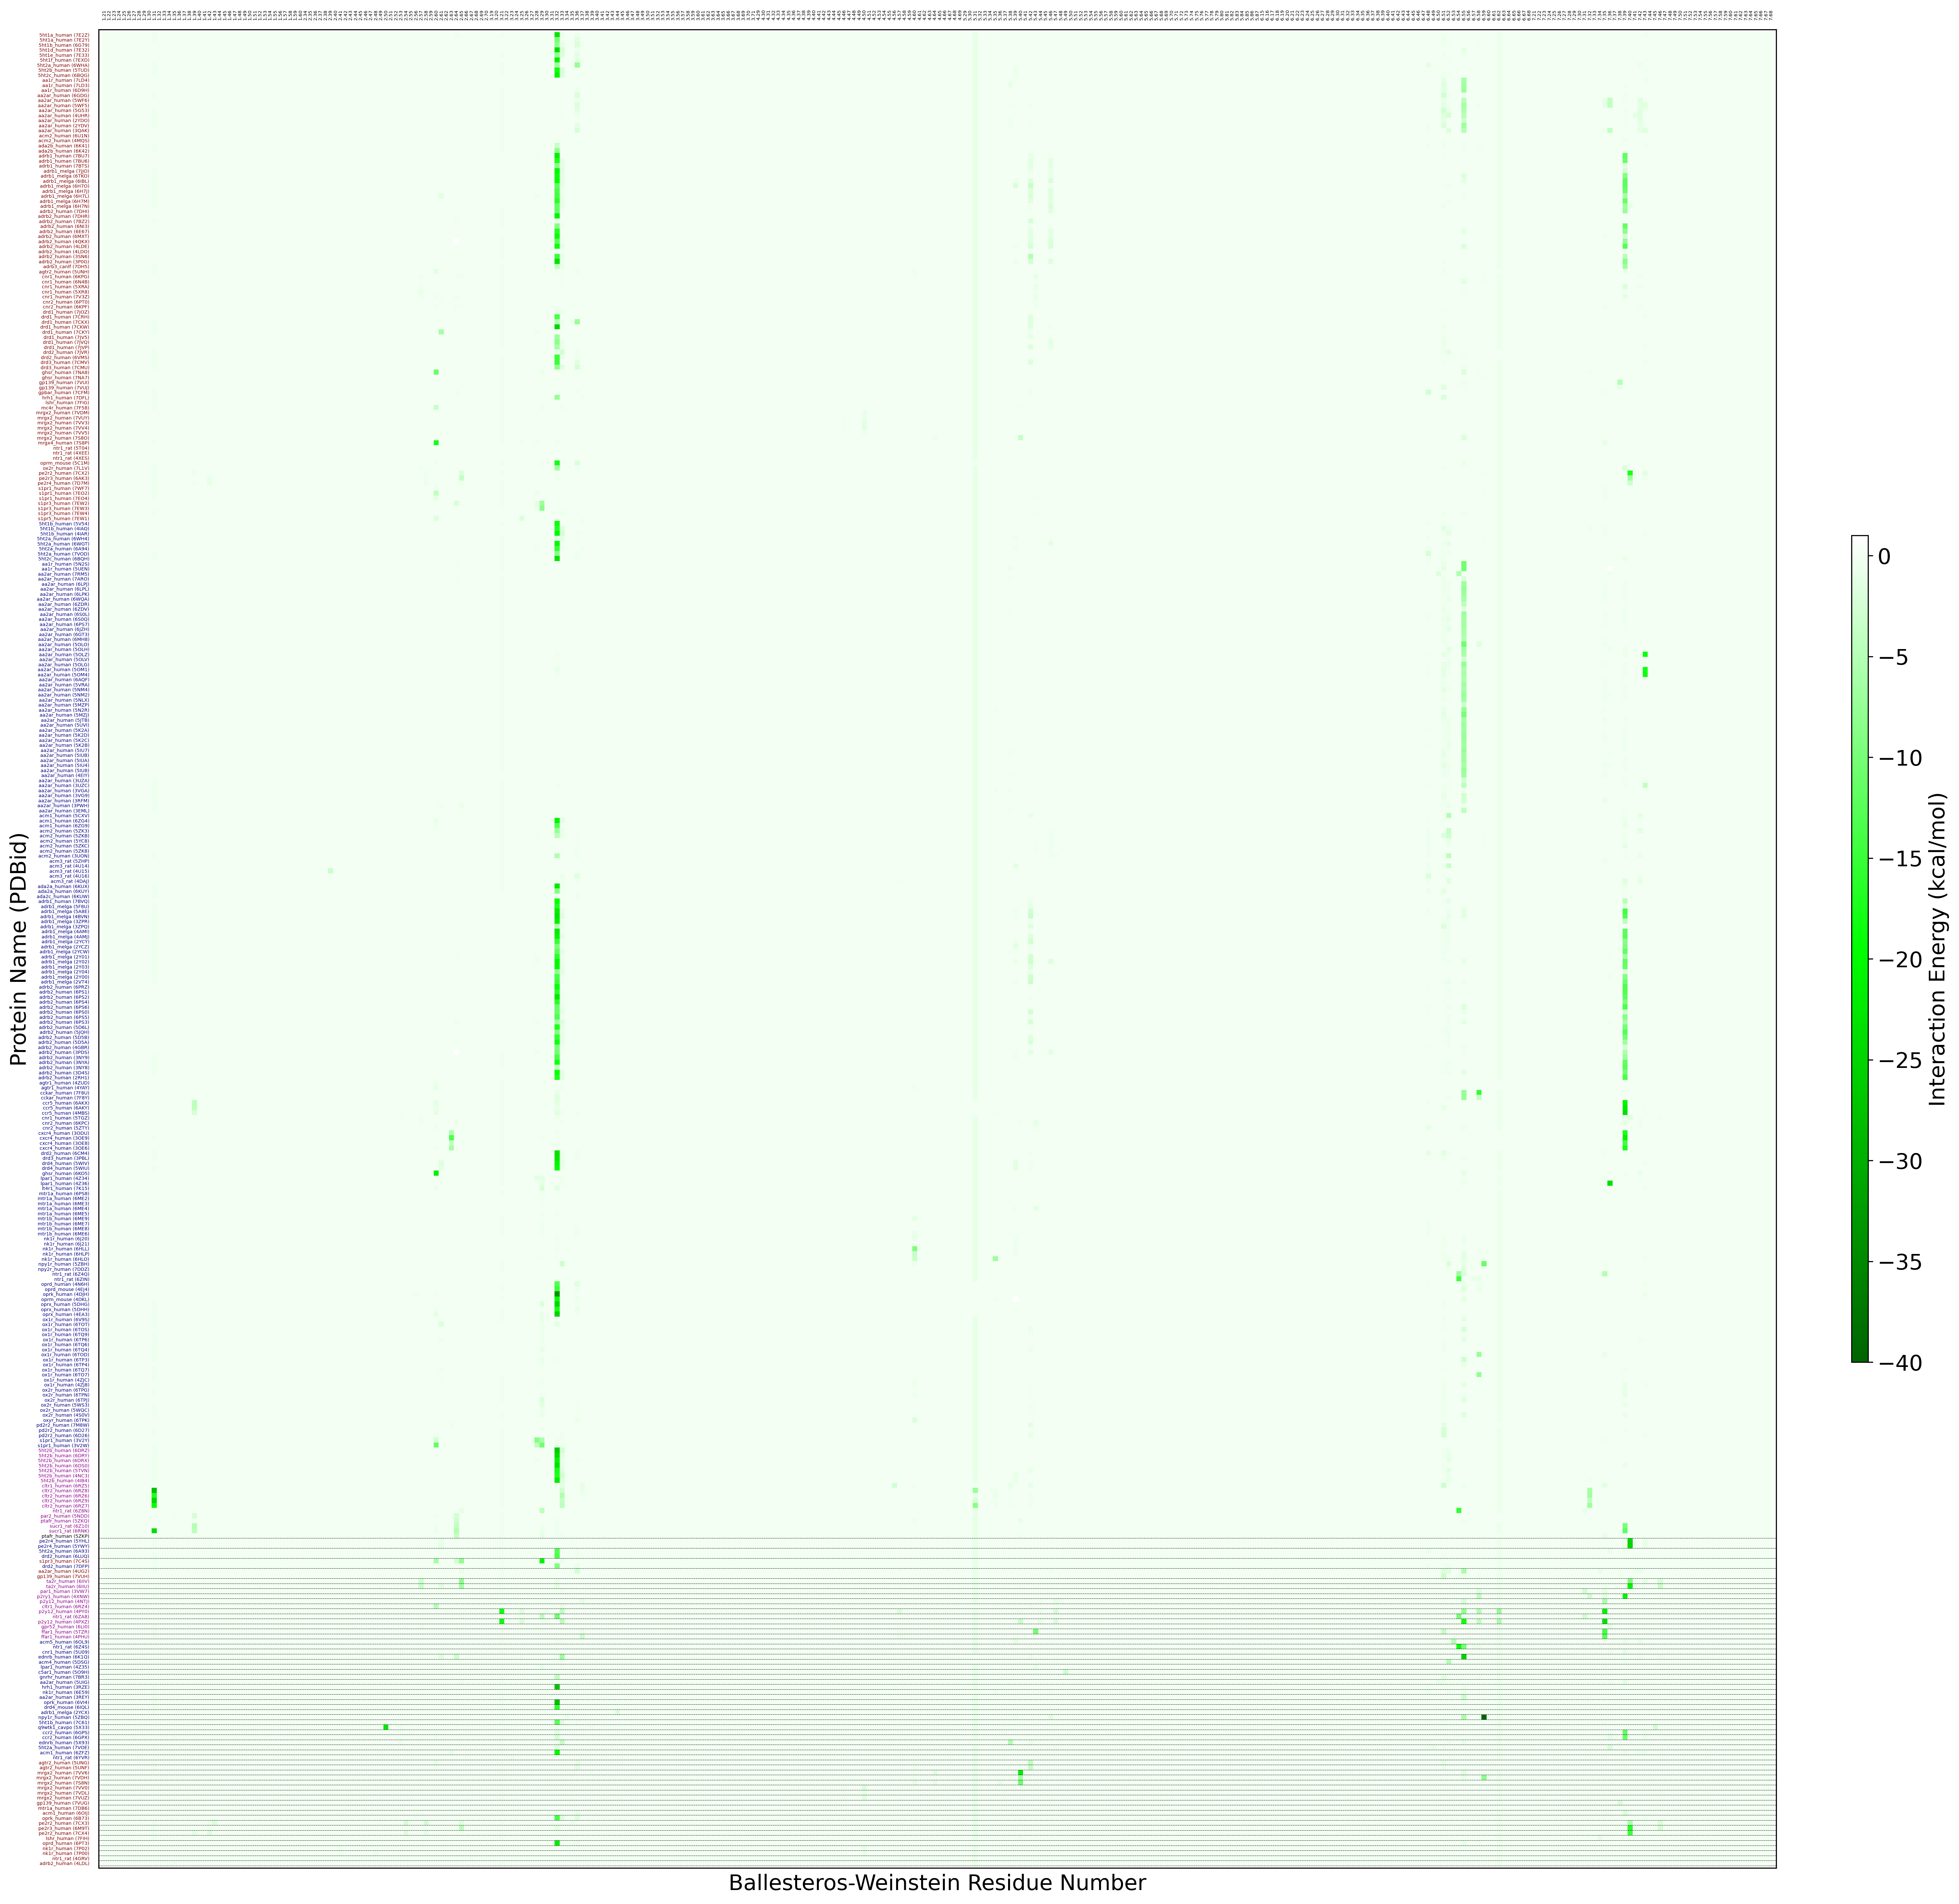

In [152]:
# plot cluster heatmap (all residues)

#imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# copy X to plotX, sort by cluster labels then protein names
plotX = pd.read_csv('data/364_interaction_energies_state_function_v3.txt', sep='\t')

# drop non-intenergysum columns
for col in plotX.columns:
    if 'intenergysum' not in col:
        plotX.drop(col, axis = 1, inplace = True)
        
my_imputer = SimpleImputer()
plotX = pd.DataFrame(my_imputer.fit_transform(plotX))

        
plotX['PDBID'] = PDBids
plotX['protein_names'] = protein_names
plotX['cluster_labels'] = labels
plotX['protein_NPDB'] = protein_NPDB
plotX['states'] = states
plotX.sort_values(by = ['cluster_labels', 'states', 'protein_names'], ascending = [True, True, True], na_position = 'first', inplace = True)
plotX.reset_index(inplace = True)
plotX.drop(['index'], axis = 1, inplace = True)

X_mat = plotX.drop(['PDBID', 'protein_names', 'cluster_labels', 'protein_NPDB', 'states'], axis = 1)

# convert some variables to numpy arrays for sorting
structure_df_np = structure_df.to_numpy()
X_mat_np = X_mat.to_numpy()
PDBids_np = np.array(PDBids)
resnums_np = np.array(resnums)
protein_names_np = np.array(protein_names)

# normalization and colormap
norm = plt.Normalize(-40,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])

# plotting
fig = plt.figure(figsize=(25, 25), dpi = 300)
ax = fig.add_subplot(111)
cax = ax.matshow(X_mat, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = fig.colorbar(cax, fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90, fontsize = 16)
cbar.ax.tick_params(labelsize=16)
plt.yticks(np.arange(len(y)), list(plotX['protein_NPDB']), fontsize = 3.5)
plt.xticks(np.arange(len(X_mat.columns)), resnums, fontsize = 3.5, rotation = 90)
plt.xlim([-1,len(resnums)])
plt.ylim([-1,len(PDBids)])
plt.xlabel("Ballesteros-Weinstein Residue Number", fontsize = 16)
plt.ylabel("Protein Name (PDBid)", fontsize = 16)
plt.gca().invert_yaxis()
#plt.gca().xaxis.set_label_position('top') 


# row lines
for i in row_line_markers:
     plt.axhline(y = i - 0.5, color='black', linestyle='dashed', linewidth = 0.25)


# remove tick marks, keep labels        
plt.gca().tick_params(
    axis='both',          # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelbottom=False) # labels along the bottom edge are off

# color tick labels by activation state
for i in range(len(plotX['states'])):
    #print(i, plotX['PDBID'][i], plotX['states'][i])
    if plotX['states'][i] == 'Active':
        plt.gca().get_yticklabels()[i].set_color("maroon")
    elif plotX['states'][i] == 'Inactive':
        plt.gca().get_yticklabels()[i].set_color("navy")
    elif plotX['states'][i] == 'Intermediate':
        plt.gca().get_yticklabels()[i].set_color("darkmagenta")
    elif plotX['states'][i] == 'Other':
        plt.gca().get_yticklabels()[i].set_color("black")
        
plt.show()

In [93]:
df.drop(['cluster_labels'], axis = 1, inplace = True)

### K-means Clustering

In [94]:
from sklearn.cluster import KMeans
rng = 1

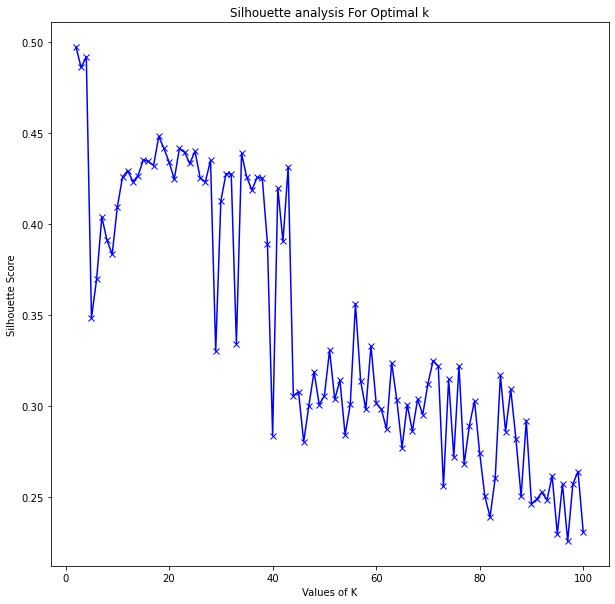

In [95]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
kmax = 100
for k in range(2, kmax+1):
    # initialise kmeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)   
plt.plot(list(range(2, kmax+1)),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

C:\Users\Greg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



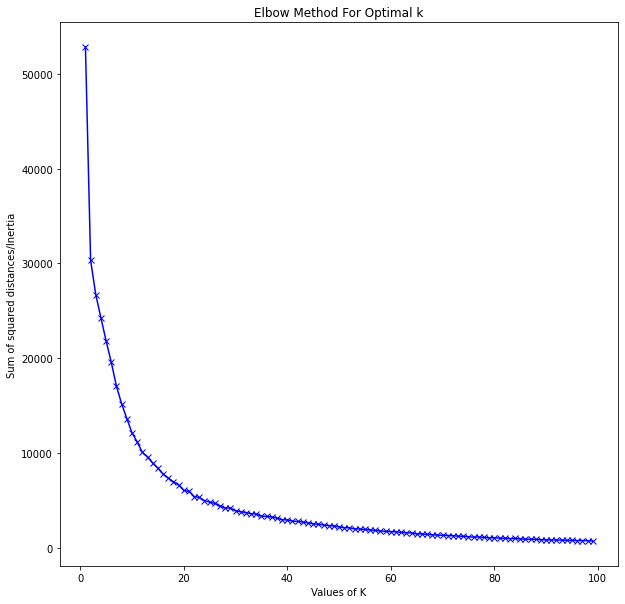

In [96]:
Sum_of_squared_distances = []
K = range(1,100)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.gcf().set_size_inches(10,10)
plt.gcf().set_dpi(72)    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [97]:
clustering = KMeans(n_clusters=33, random_state=rng)
clustering.fit(X)
labels = clustering.labels_
df['cluster_labels'] = labels

In [98]:
for i in range(1, 33, 1):
    display(df.loc[df['cluster_labels'] == i])

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
21   7CMV        Active     Agonist                NaN           NaN   
23   7CRH        Active     Agonist                NaN           NaN   
56   7C61      Inactive  Antagonist                NaN           NaN   
60   6VMS        Active     Agonist                NaN           NaN   
64   6LUQ      Inactive  Antagonist                NaN           NaN   
123  6A94      Inactive  Antagonist                NaN           NaN   
124  6A93      Inactive  Antagonist                NaN           NaN   
173  6B73        Active     Agonist                NaN           NaN   
185  5TUD        Active     Agonist                NaN           NaN   
201  5TVN  Intermediate     Agonist                NaN           NaN   
223  5DHH      Inactive  Antagonist                NaN           NaN   
238  4N6H      Inactive  Antagonist                NaN           NaN   
239  4NC3  Intermediate     Agonist                NaN           NaN   
245  4IAQ      Inactive     Agonist                NaN           NaN   
302  6ZG9      Inactive     Agonist                NaN           NaN   
330  5F8U      Inactive  Antagonist                NaN           NaN   
347  6IQL      Inactive  Antagonist                NaN           NaN   
359  5C1M        Active     Agonist                NaN           NaN   
360  4EJ4      Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
21               NaN           NaN              NaN                NaN   
23               NaN           NaN              NaN                NaN   
56               NaN           NaN              NaN                NaN   
60               NaN           NaN              NaN                NaN   
64               NaN           NaN              NaN                NaN   
123              NaN           NaN              NaN                NaN   
124              NaN           NaN              NaN                NaN   
173              NaN           NaN              NaN                NaN   
185              NaN           NaN              NaN                NaN   
201              NaN           NaN              NaN                NaN   
223              NaN           NaN              NaN                NaN   
238              NaN           NaN              NaN                NaN   
239              NaN           NaN              NaN                NaN   
245              NaN           NaN              NaN                NaN   
302              NaN           NaN              NaN                NaN   
330              NaN           NaN              NaN                NaN   
347              NaN           NaN              NaN                NaN   
359              NaN           NaN              NaN                NaN   
360              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
21            NaN  ...            NaN             NaN            NaN   
23            NaN  ...            NaN             NaN            NaN   
56            NaN  ...            NaN             NaN            NaN   
60            NaN  ...            NaN             NaN            NaN   
64            NaN  ...            NaN             NaN            NaN   
123           NaN  ...            NaN             NaN            NaN   
124           NaN  ...            NaN             NaN            NaN   
173           NaN  ...            NaN             NaN            NaN   
185           NaN  ...            NaN             NaN            NaN   
201           NaN  ...            NaN             NaN            NaN   
223           NaN  ...            NaN             NaN            NaN   
238           NaN  ...            NaN             NaN            NaN   
239           NaN  ...            NaN             NaN            NaN   
245           NaN  ...            NaN             NaN            NaN   
30

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
271  3ODU  Inactive  Antagonist                NaN           NaN   
272  3OE9  Inactive  Antagonist                NaN           NaN   
273  3OE8  Inactive  Antagonist                NaN           NaN   
274  3OE6  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
271              NaN           NaN              NaN                NaN   
272              NaN           NaN              NaN                NaN   
273              NaN           NaN              NaN                NaN   
274              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
271           NaN  ...            NaN             NaN            NaN   
272           NaN  ...            NaN             NaN            NaN   
273           NaN  ...            NaN             NaN            NaN   
274           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
271              NaN               NaN            NaN             NaN   
272              NaN               NaN            NaN             NaN   
273              NaN               NaN            NaN             NaN   
274              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
271            NaN              NaN              2  
272            NaN              NaN              2  
273            NaN              NaN              2  
274            NaN              NaN              2  

[4 rows x 1664 columns]

PDBID         State         Function  1.21_intenergysum 1.21_inttype1  \
94   6NI3        Active          Agonist                NaN           NaN   
100  6PS6      Inactive       Antagonist                NaN           NaN   
103  6PS3      Inactive       Antagonist                NaN           NaN   
130  6GPS      Inactive       Antagonist                NaN           NaN   
131  6GPX      Inactive       Antagonist                NaN           NaN   
210  5JQH      Inactive  Inverse agonist                NaN           NaN   
277  3NY8      Inactive  Inverse agonist                NaN           NaN   
321  7DH5        Active          Agonist                NaN           NaN   
339  2YCZ      Inactive       Antagonist                NaN           NaN   
362  6Z10  Intermediate       Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
94               NaN           NaN              NaN                NaN   
100              NaN           NaN              NaN                NaN   
103              NaN           NaN              NaN                NaN   
130              NaN           NaN              NaN                NaN   
131              NaN           NaN              NaN                NaN   
210              NaN           NaN              NaN                NaN   
277              NaN           NaN              NaN                NaN   
321              NaN           NaN              NaN                NaN   
339              NaN           NaN              NaN                NaN   
362              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
94            NaN  ...            NaN             NaN            NaN   
100           NaN  ...            NaN             NaN            NaN   
103           NaN  ...            NaN             NaN            NaN   
130           NaN  ...            NaN             NaN            NaN   
131           NaN  ...            NaN             NaN            NaN   
210           NaN  ...            NaN             NaN            NaN   
277           NaN  ...            NaN             NaN            NaN   
321           NaN  ...            NaN             NaN            NaN   
339           NaN  ...            NaN             NaN            NaN   
362          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
94               NaN               NaN            NaN             NaN   
100              NaN               NaN            NaN             NaN   
103              NaN               NaN            NaN             NaN   
130              NaN               NaN            NaN             NaN   
131              NaN               NaN            NaN             NaN   
210              NaN               NaN            NaN             NaN   
277              NaN               NaN            NaN             NaN   
321              NaN               NaN            NaN             NaN   
339              NaN               NaN            NaN             NaN   
362              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
94             NaN              NaN              3  
100            NaN              NaN              3  
103            NaN              NaN              3  
130            NaN              NaN              3  
131            NaN              NaN              3  
210            NaN              NaN              3  
277            NaN              NaN              3  
321            NaN              NaN              3  
339            NaN              NaN              3  
362            NaN              NaN              3  

[10 rows x 1664 columns]

PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
37   7BU7    Active          Agonist                NaN           NaN   
38   7BU6    Active          Agonist                NaN           NaN   
96   6PRZ  Inactive       Antagonist                NaN           NaN   
97   6PS1  Inactive       Antagonist                NaN           NaN   
98   6PS2  Inactive       Antagonist                NaN           NaN   
208  5D6L  Inactive  Inverse agonist                NaN           NaN   
241  4LDE    Active          Agonist                NaN           NaN   
268  3P0G    Active          Agonist                NaN           NaN   
276  3NYA  Inactive       Antagonist                NaN           NaN   
279  3D4S  Inactive  Inverse agonist                NaN           NaN   
280  2RH1  Inactive  Inverse agonist                NaN           NaN   
323  6TKO    Active          Agonist                NaN           NaN   
324  6IBL    Active          Agonist                NaN           NaN   
328  6H7M    Active          Agonist                NaN           NaN   
331  5A8E  Inactive  Inverse agonist                NaN           NaN   
332  4BVN  Inactive       Antagonist                NaN           NaN   
335  4AMI  Inactive          Agonist                NaN           NaN   
336  4AMJ  Inactive  Inverse agonist                NaN           NaN   
342  2Y02  Inactive          Agonist                NaN           NaN   
343  2Y03  Inactive          Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
37               NaN           NaN              NaN                NaN   
38               NaN           NaN              NaN                NaN   
96               NaN           NaN              NaN                NaN   
97               NaN           NaN              NaN                NaN   
98               NaN           NaN              NaN                NaN   
208              NaN           NaN              NaN                NaN   
241              NaN           NaN              NaN                NaN   
268              NaN           NaN              NaN                NaN   
276              NaN           NaN              NaN                NaN   
279              NaN           NaN              NaN                NaN   
280              NaN           NaN              NaN                NaN   
323              NaN           NaN              NaN                NaN   
324              NaN           NaN              NaN                NaN   
328              NaN           NaN              NaN                NaN   
331              NaN           NaN              NaN                NaN   
332              NaN           NaN              NaN                NaN   
335              NaN           NaN              NaN                NaN   
336              NaN           NaN              NaN                NaN   
342              NaN           NaN              NaN                NaN   
343              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
37            NaN  ...            NaN             NaN            NaN   
38            NaN  ...            NaN             NaN            NaN   
96            NaN  ...            NaN             NaN            NaN   
97            NaN  ...            NaN             NaN            NaN   
98            NaN  ...            NaN             NaN            NaN   
208           NaN  ...            NaN             NaN            NaN   
241           NaN  ...            NaN             NaN            NaN   
268           NaN  ...            NaN             NaN            NaN   
276           NaN  ...            NaN             NaN            NaN   
279           NaN  ...            NaN             NaN            NaN   
280           NaN  ...            NaN             NaN            NaN   
323           NaN  ...            NaN             N

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
86  6RZ8  Intermediate  Antagonist                NaN           NaN   
87  6RZ6  Intermediate  Antagonist                NaN           NaN   
88  6RZ9  Intermediate  Antagonist                NaN           NaN   
89  6RZ7  Intermediate  Antagonist                NaN           NaN   

    1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
86              NaN           NaN              NaN                NaN   
87              NaN           NaN              NaN                NaN   
88              NaN           NaN              NaN                NaN   
89              NaN           NaN              NaN                NaN   

   1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
86           NaN  ...            NaN             NaN            NaN   
87           NaN  ...            NaN             NaN            NaN   
88           NaN  ...            NaN             NaN            NaN   
89           NaN  ...            NaN             NaN            NaN   

    7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
86              NaN               NaN            NaN             NaN   
87              NaN               NaN            NaN             NaN   
88              NaN               NaN            NaN             NaN   
89              NaN               NaN            NaN             NaN   

    7.68_inttype2  7.68_intenergy2 cluster_labels  
86            NaN              NaN              5  
87            NaN              NaN              5  
88            NaN              NaN              5  
89            NaN              NaN              5  

[4 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
137  5YHL  Inactive  Antagonist                NaN           NaN   
138  5YWY  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
137              NaN           NaN              NaN                NaN   
138              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
137           NaN  ...            NaN             NaN            NaN   
138           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
137              NaN               NaN            NaN             NaN   
138              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
137            NaN              NaN              6  
138            NaN              NaN              6  

[2 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
166  5OLO  Inactive  Antagonist                NaN           NaN   
186  5N2S  Inactive     Agonist                NaN           NaN   
189  5MZJ  Inactive  Antagonist                NaN           NaN   
199  5UEN  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
166              NaN           NaN              NaN                NaN   
186              NaN           NaN              NaN                NaN   
189              NaN           NaN              NaN                NaN   
199              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
166           NaN  ...            NaN             NaN            NaN   
186           NaN  ...            NaN             NaN            NaN   
189           NaN  ...            NaN             NaN            NaN   
199           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
166              NaN               NaN            NaN             NaN   
186              NaN               NaN            NaN             NaN   
189              NaN               NaN            NaN             NaN   
199              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
166            NaN              NaN              7  
186            NaN              NaN              7  
189            NaN              NaN              7  
199            NaN              NaN              7  

[4 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
159  5ZBH  Inactive  Antagonist                NaN           NaN   
287  7VDH    Active     Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
159              NaN           NaN              NaN                NaN   
287              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
159           NaN  ...            NaN             NaN            NaN   
287           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
159              NaN               NaN            NaN             NaN   
287              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
159            NaN              NaN              8  
287            NaN              NaN              8  

[2 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
158  5ZBQ  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
158              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
158           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
158              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
158            NaN              NaN              9  

[1 rows x 1664 columns]

PDBID         State           Function  1.21_intenergysum 1.21_inttype1  \
235  4PY0  Intermediate  Agonist (partial)                NaN           NaN   
236  4PXZ  Intermediate            Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
235              NaN           NaN              NaN                NaN   
236              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
235           NaN  ...            NaN             NaN            NaN   
236           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
235              NaN               NaN            NaN             NaN   
236              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
235            NaN              NaN             10  
236            NaN              NaN             10  

[2 rows x 1664 columns]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
63   6VI4      Inactive  Antagonist                NaN           NaN   
149  6DRZ  Intermediate  Antagonist                NaN           NaN   
254  4DJH      Inactive  Antagonist                NaN           NaN   
264  3RZE      Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
63               NaN           NaN              NaN                NaN   
149              NaN           NaN              NaN                NaN   
254              NaN           NaN              NaN                NaN   
264              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
63            NaN  ...            NaN             NaN            NaN   
149           NaN  ...            NaN             NaN            NaN   
254           NaN  ...            NaN             NaN            NaN   
264           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
63               NaN               NaN            NaN             NaN   
149              NaN               NaN            NaN             NaN   
254              NaN               NaN            NaN             NaN   
264              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
63             NaN              NaN             11  
149            NaN              NaN             11  
254            NaN              NaN             11  
264            NaN              NaN             11  

[4 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
168  5OLZ  Inactive  Antagonist                NaN           NaN   
171  5OM1  Inactive  Antagonist                NaN           NaN   
172  5OM4  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
168              NaN           NaN              NaN                NaN   
171              NaN           NaN              NaN                NaN   
172              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
168           NaN  ...            NaN             NaN            NaN   
171           NaN  ...            NaN             NaN            NaN   
172           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
168              NaN               NaN            NaN             NaN   
171              NaN               NaN            NaN             NaN   
172              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
168            NaN              NaN             12  
171            NaN              NaN             12  
172            NaN              NaN             12  

[3 rows x 1664 columns]

PDBID         State           Function  1.21_intenergysum 1.21_inttype1  \
9    7EXD        Active            Agonist                NaN           NaN   
14   7E32        Active            Agonist                NaN           NaN   
15   7E2Z        Active  Agonist (partial)                NaN           NaN   
25   7CKW        Active            Agonist                NaN           NaN   
36   7DHR        Active            Agonist                NaN           NaN   
39   7BVQ      Inactive    Inverse agonist                NaN           NaN   
49   6WGT      Inactive            Agonist                NaN           NaN   
90   6PT3        Active            Agonist                NaN           NaN   
91   6KUX      Inactive         Antagonist                NaN           NaN   
144  6MXT        Active            Agonist                NaN           NaN   
150  6DRY  Intermediate            Agonist                NaN           NaN   
151  6DRX  Intermediate         Antagonist                NaN           NaN   
152  6DS0  Intermediate         Antagonist                NaN           NaN   
160  6CM4      Inactive    Inverse agonist                NaN           NaN   
163  6BQG        Active            Agonist                NaN           NaN   
164  6BQH      Inactive    Inverse agonist                NaN           NaN   
165  5V54      Inactive         Antagonist                NaN           NaN   
179  5WIV      Inactive         Antagonist                NaN           NaN   
180  5WIU      Inactive         Antagonist                NaN           NaN   
222  5DHG      Inactive         Antagonist                NaN           NaN   
246  4IAR      Inactive            Agonist                NaN           NaN   
247  4IB4  Intermediate            Agonist                NaN           NaN   
251  4EA3      Inactive         Antagonist                NaN           NaN   
270  3PBL      Inactive         Antagonist                NaN           NaN   
300  6ZFZ      Inactive            Agonist                NaN           NaN   
301  6ZG4      Inactive            Agonist                NaN           NaN   
322  7JJO        Active            Agonist                NaN           NaN   
333  3ZPR      Inactive         Antagonist                NaN           NaN   
361  4DKL      Inactive         Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
9                NaN           NaN              NaN                NaN   
14               NaN           NaN              NaN                NaN   
15               NaN           NaN              NaN                NaN   
25               NaN           NaN              NaN                NaN   
36               NaN           NaN              NaN                NaN   
39               NaN           NaN              NaN                NaN   
49               NaN           NaN              NaN                NaN   
90               NaN           NaN              NaN                NaN   
91               NaN           NaN              NaN                NaN   
144              NaN           NaN              NaN                NaN   
150              NaN           NaN              NaN                NaN   
151              NaN           NaN              NaN                NaN   
152              NaN           NaN              NaN                NaN   
160              NaN           NaN              NaN                NaN   
163              NaN           NaN              NaN                NaN   
164              NaN           NaN              NaN                NaN   
165              NaN           NaN              NaN                NaN   
179              NaN           NaN              NaN                NaN   
180              NaN           NaN              NaN                NaN   
222              NaN           NaN              NaN                NaN   
246              NaN           NaN              NaN                NaN   
247  

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
53   6KO5  Inactive  Antagonist                NaN           NaN   
299  7S8P    Active     Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
53               NaN           NaN              NaN                NaN   
299              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
53            NaN  ...            NaN             NaN            NaN   
299           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
53               NaN               NaN            NaN             NaN   
299              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
53             NaN              NaN             14  
299            NaN              NaN             14  

[2 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
296  7VV6  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
296           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
296            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
296               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
296              NaN             15  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
226  4Z36  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
226              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
226           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
226              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
226            NaN              NaN             16  

[1 rows x 1664 columns]

PDBID         State         Function  1.21_intenergysum 1.21_inttype1  \
351  6Z8N  Intermediate          Agonist                NaN           NaN   
352  6ZIN      Inactive  Inverse agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
351              NaN           NaN              NaN                NaN   
352              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
351           NaN  ...            NaN             NaN            NaN   
352           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
351              NaN               NaN            NaN             NaN   
352              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
351            NaN              NaN             17  
352            NaN              NaN             17  

[2 rows x 1664 columns]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
363  6RNK  Intermediate  Antagonist                0.0          None   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
363              0.0          None              0.0                0.0   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
363          None  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
363              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
363            NaN              NaN             18  

[1 rows x 1664 columns]

PDBID         State           Function  1.21_intenergysum 1.21_inttype1  \
16   7E2Y        Active            Agonist                NaN           NaN   
17   7E33        Active            Agonist                NaN           NaN   
20   7DFL        Active            Agonist                NaN           NaN   
22   7CMU        Active            Agonist                NaN           NaN   
24   7CKX        Active            Agonist                NaN           NaN   
27   7JV5        Active            Agonist                NaN           NaN   
28   7JVQ        Active            Agonist                NaN           NaN   
29   7JVP        Active            Agonist                NaN           NaN   
32   7L1V        Active            Agonist                NaN           NaN   
34   7DFP      Inactive         Antagonist                NaN           NaN   
40   7BTS        Active            Agonist                NaN           NaN   
46   7BR3      Inactive         Antagonist                NaN           NaN   
47   6WHA        Active            Agonist                NaN           NaN   
62   6K42        Active            Agonist                NaN           NaN   
92   6KUY      Inactive  Agonist (partial)                NaN           NaN   
101  6PS0      Inactive         Antagonist                NaN           NaN   
139  5ZK3      Inactive         Antagonist                NaN           NaN   
140  5ZKB      Inactive         Antagonist                NaN           NaN   
153  6G79        Active            Agonist                NaN           NaN   
249  4GBR      Inactive    Inverse agonist                NaN           NaN   
259  3UON      Inactive         Antagonist                NaN           NaN   
282  7VOD      Inactive  Agonist (partial)                NaN           NaN   
334  3ZPQ      Inactive         Antagonist                NaN           NaN   
344  2Y04      Inactive  Agonist (partial)                NaN           NaN   
354  6ZA8  Intermediate  Agonist (partial)                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
16               NaN           NaN              NaN                NaN   
17               NaN           NaN              NaN                NaN   
20               NaN           NaN              NaN                NaN   
22               NaN           NaN              NaN                NaN   
24               NaN           NaN              NaN                NaN   
27               NaN           NaN              NaN                NaN   
28               NaN           NaN              NaN                NaN   
29               NaN           NaN              NaN                NaN   
32               NaN           NaN              NaN                NaN   
34               NaN           NaN              NaN                NaN   
40               NaN           NaN              NaN                NaN   
46               NaN           NaN              NaN                NaN   
47               NaN           NaN              NaN                NaN   
62               NaN           NaN              NaN                NaN   
92               NaN           NaN              NaN                NaN   
101              NaN           NaN              NaN                NaN   
139              NaN           NaN              NaN                NaN   
140              NaN           NaN              NaN                NaN   
153              NaN           NaN              NaN                NaN   
249              NaN           NaN              NaN                NaN   
259              NaN           NaN              NaN                NaN   
282              NaN           NaN              NaN                NaN   
334              NaN           NaN              NaN                NaN   
344              NaN           NaN              NaN                NaN   
354              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
10  7C4S  Active  Agonist                NaN           NaN              NaN   

   1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
10           NaN              NaN                NaN           NaN  ...   

    7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
10            NaN             NaN            NaN              NaN   

   7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
10               NaN            NaN             NaN            NaN   

    7.68_intenergy2 cluster_labels  
10              NaN             20  

[1 rows x 1664 columns]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
12   7CX2        Active     Agonist                NaN           NaN   
13   7CX4        Active     Agonist                NaN           NaN   
132  6IIU  Intermediate  Antagonist                NaN           NaN   
133  6IIV  Intermediate  Antagonist                NaN           NaN   
136  6M9T        Active     Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
12               NaN           NaN              NaN                NaN   
13               NaN           NaN              NaN                NaN   
132              NaN           NaN              NaN                NaN   
133              NaN           NaN              NaN                NaN   
136              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
12            NaN  ...            NaN             NaN            NaN   
13            NaN  ...            NaN             NaN            NaN   
132           NaN  ...            NaN             NaN            NaN   
133           NaN  ...            NaN             NaN            NaN   
136           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
12               NaN               NaN            NaN             NaN   
13               NaN               NaN            NaN             NaN   
132              NaN               NaN            NaN             NaN   
133              NaN               NaN            NaN             NaN   
136              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
12             NaN              NaN             21  
13             NaN              NaN             21  
132            NaN              NaN             21  
133            NaN              NaN             21  
136            NaN              NaN             21  

[5 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
4    7LD4    Active     Agonist                NaN           NaN   
5    7LD3    Active     Agonist                NaN           NaN   
41   6LPJ  Inactive  Antagonist                NaN           NaN   
42   6LPL  Inactive  Antagonist                NaN           NaN   
43   6LPK  Inactive  Antagonist                NaN           NaN   
44   6WQA  Inactive  Antagonist                NaN           NaN   
50   6ZDR  Inactive  Antagonist                NaN           NaN   
57   6S0L  Inactive  Antagonist                NaN           NaN   
58   6S0Q  Inactive  Antagonist                NaN           NaN   
95   6PS7  Inactive  Antagonist                NaN           NaN   
105  6JZH  Inactive  Antagonist                NaN           NaN   
109  6GT3  Inactive  Antagonist                NaN           NaN   
112  6MH8  Inactive  Antagonist                NaN           NaN   
154  6D9H    Active     Agonist                NaN           NaN   
167  5OLH  Inactive  Antagonist                NaN           NaN   
170  5OLG  Inactive  Antagonist                NaN           NaN   
174  6AQF  Inactive  Antagonist                NaN           NaN   
176  5VRA  Inactive  Antagonist                NaN           NaN   
181  5NM4  Inactive  Antagonist                NaN           NaN   
182  5NM2  Inactive  Antagonist                NaN           NaN   
183  5NLX  Inactive  Antagonist                NaN           NaN   
188  5N2R  Inactive  Antagonist                NaN           NaN   
193  5JTB  Inactive  Antagonist                NaN           NaN   
194  5UVI  Inactive  Antagonist                NaN           NaN   
204  5K2A  Inactive  Antagonist                NaN           NaN   
205  5K2D  Inactive  Antagonist                NaN           NaN   
206  5K2C  Inactive  Antagonist                NaN           NaN   
207  5K2B  Inactive  Antagonist                NaN           NaN   
209  5G53    Active     Agonist                NaN           NaN   
211  5IU7  Inactive  Antagonist                NaN           NaN   
212  5IUB  Inactive  Antagonist                NaN           NaN   
213  5IUA  Inactive  Antagonist                NaN           NaN   
214  5IU4  Inactive  Antagonist                NaN           NaN   
215  5IU8  Inactive  Antagonist                NaN           NaN   
229  4UHR    Active     Agonist                NaN           NaN   
230  4UG2    Active     Agonist                NaN           NaN   
250  4EIY  Inactive  Antagonist                NaN           NaN   
253  3UZC  Inactive  Antagonist                NaN           NaN   
266  2YDV    Active     Agonist                NaN           NaN   
278  3EML  Inactive  Antagonist                NaN           NaN   
305  7F8Y  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
4                NaN           NaN              NaN                NaN   
5                NaN           NaN              NaN                NaN   
41               NaN           NaN              NaN                NaN   
42               NaN           NaN              NaN                NaN   
43               NaN           NaN              NaN                NaN   
44               NaN           NaN              NaN                NaN   
50               NaN           NaN              NaN                NaN   
57               NaN           NaN              NaN                NaN   
58               NaN           NaN              NaN                NaN   
95               NaN           NaN              NaN                NaN   
105              NaN           NaN              NaN                NaN   
109              NaN           NaN              NaN                NaN   
112              NaN           NaN              NaN                NaN   
154              NaN           NaN              NaN                NaN   
167              NaN           NaN   

PDBID     State           Function  1.21_intenergysum 1.21_inttype1  \
35   7DHI    Active            Agonist                NaN           NaN   
99   6PS4  Inactive         Antagonist                NaN           NaN   
102  6PS5  Inactive         Antagonist                NaN           NaN   
110  6E67    Active            Agonist                NaN           NaN   
220  5D5B  Inactive    Inverse agonist                NaN           NaN   
221  5D5A  Inactive    Inverse agonist                NaN           NaN   
233  4QKX    Active            Agonist                NaN           NaN   
263  3SN6    Active            Agonist                NaN           NaN   
269  3PDS  Inactive            Agonist                NaN           NaN   
275  3NY9  Inactive    Inverse agonist                NaN           NaN   
325  6H7O    Active            Agonist                NaN           NaN   
326  6H7J    Active            Agonist                NaN           NaN   
327  6H7L    Active            Agonist                NaN           NaN   
329  6H7N    Active            Agonist                NaN           NaN   
337  2YCY  Inactive         Antagonist                NaN           NaN   
340  2YCW  Inactive         Antagonist                NaN           NaN   
341  2Y01  Inactive  Agonist (partial)                NaN           NaN   
345  2Y00  Inactive  Agonist (partial)                NaN           NaN   
346  2VT4  Inactive         Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
35               NaN           NaN              NaN                NaN   
99               NaN           NaN              NaN                NaN   
102              NaN           NaN              NaN                NaN   
110              NaN           NaN              NaN                NaN   
220              NaN           NaN              NaN                NaN   
221              NaN           NaN              NaN                NaN   
233              NaN           NaN              NaN                NaN   
263              NaN           NaN              NaN                NaN   
269              NaN           NaN              NaN                NaN   
275              NaN           NaN              NaN                NaN   
325              NaN           NaN              NaN                NaN   
326              NaN           NaN              NaN                NaN   
327              NaN           NaN              NaN                NaN   
329              NaN           NaN              NaN                NaN   
337              NaN           NaN              NaN                NaN   
340              NaN           NaN              NaN                NaN   
341              NaN           NaN              NaN                NaN   
345              NaN           NaN              NaN                NaN   
346              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
35            NaN  ...            NaN             NaN            NaN   
99            NaN  ...            NaN             NaN            NaN   
102           NaN  ...            NaN             NaN            NaN   
110           NaN  ...            NaN             NaN            NaN   
220           NaN  ...            NaN             NaN            NaN   
221           NaN  ...            NaN             NaN            NaN   
233           NaN  ...            NaN             NaN            NaN   
263           NaN  ...            NaN             NaN            NaN   
269           NaN  ...            NaN             NaN            NaN   
275           NaN  ...            NaN             NaN            NaN   
325           NaN  ...            NaN             NaN            NaN   
326           NaN  ...            NaN             NaN            NaN   
327           NaN  ...            NaN             NaN            NaN   
329           

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
348  5X33  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
348              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
348           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
348              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
348            NaN              NaN             24  

[1 rows x 1664 columns]

PDBID         State Function  1.21_intenergysum 1.21_inttype1  \
192  5TZR  Intermediate  Agonist                NaN           NaN   
234  4PHU  Intermediate  Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
192              NaN           NaN              NaN                NaN   
234              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
192           NaN  ...            NaN             NaN            NaN   
234           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
192              NaN               NaN            NaN             NaN   
234              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
192            NaN              NaN             25  
234            NaN              NaN             25  

[2 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
304  7F8U  Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
304              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
304           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
304              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
304            NaN              NaN             26  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
256  3V2W  Inactive  Antagonist                NaN           NaN   
306  7NA8    Active     Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
256              NaN           NaN              NaN                NaN   
306              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
256           NaN  ...            NaN             NaN            NaN   
306           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
256              NaN               NaN            NaN             NaN   
306              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
256            NaN              NaN             27  
306            NaN              NaN             27  

[2 rows x 1664 columns]

PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
108  6K1Q  Inactive  Inverse agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
108              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
108           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
108              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
108            NaN              NaN             28  

[1 rows x 1664 columns]

PDBID     State    Function  1.21_intenergysum 1.21_inttype1  \
2    7EW4    Active     Agonist                NaN           NaN   
3    7EW1    Active     Agonist                NaN           NaN   
6    7RM5  Inactive  Antagonist                NaN           NaN   
7    7M8W  Inactive  Antagonist                NaN           NaN   
8    7DB6    Active     Agonist                NaN           NaN   
..    ...       ...         ...                ...           ...   
353  6YVR  Inactive     Agonist                NaN           NaN   
355  5T04    Active     Agonist                NaN           NaN   
356  4XEE    Active     Agonist                NaN           NaN   
357  4XES    Active     Agonist                NaN           NaN   
358  4GRV    Active     Agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
2                NaN           NaN              NaN                NaN   
3                NaN           NaN              NaN                NaN   
6                NaN           NaN              NaN                NaN   
7                NaN           NaN              NaN                NaN   
8                NaN           NaN              NaN                NaN   
..               ...           ...              ...                ...   
353              NaN           NaN              NaN                NaN   
355              NaN           NaN              NaN                NaN   
356              NaN           NaN              NaN                NaN   
357              NaN           NaN              NaN                NaN   
358              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
2             NaN  ...            NaN             NaN            NaN   
3             NaN  ...            NaN             NaN            NaN   
6             NaN  ...            NaN             NaN            NaN   
7             NaN  ...            NaN             NaN            NaN   
8             NaN  ...            NaN             NaN            NaN   
..            ...  ...            ...             ...            ...   
353           NaN  ...            NaN             NaN            NaN   
355           NaN  ...            NaN             NaN            NaN   
356           NaN  ...            NaN             NaN            NaN   
357           NaN  ...            NaN             NaN            NaN   
358           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
2                NaN               NaN            NaN             NaN   
3                NaN               NaN            NaN             NaN   
6                NaN               NaN            NaN             NaN   
7                NaN               NaN            NaN             NaN   
8                NaN               NaN            NaN             NaN   
..               ...               ...            ...             ...   
353              NaN               NaN            NaN             NaN   
355              NaN               NaN            NaN             NaN   
356              NaN               NaN            NaN             NaN   
357              NaN               NaN            NaN             NaN   
358              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
2              NaN              NaN             29  
3              NaN              NaN             29  
6              NaN              NaN             29  
7              NaN              NaN             29  
8              NaN              NaN             29  
..             ...              ...            ...  
353            NaN              NaN             29  
355            NaN              NaN             29  
356            NaN              NaN             29  
357            NaN        

PDBID     State         Function  1.21_intenergysum 1.21_inttype1  \
350  6Z4S  Inactive  Inverse agonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
350              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
350           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
350              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
350            NaN              NaN             30  

[1 rows x 1664 columns]

PDBID         State    Function  1.21_intenergysum 1.21_inttype1  \
145  6AKX      Inactive  Antagonist                NaN           NaN   
146  6AKY      Inactive  Antagonist                NaN           NaN   
231  4XNW  Intermediate  Antagonist                NaN           NaN   
244  4MBS      Inactive  Antagonist                NaN           NaN   

     1.21_intenergy1 1.21_inttype2  1.21_intenergy2  1.22_intenergysum  \
145              NaN           NaN              NaN                NaN   
146              NaN           NaN              NaN                NaN   
231              NaN           NaN              NaN                NaN   
244              NaN           NaN              NaN                NaN   

    1.22_inttype1  ...  7.67_inttype1 7.67_intenergy1  7.67_inttype2  \
145           NaN  ...            NaN             NaN            NaN   
146           NaN  ...            NaN             NaN            NaN   
231           NaN  ...            NaN             NaN            NaN   
244           NaN  ...            NaN             NaN            NaN   

     7.67_intenergy2 7.68_intenergysum  7.68_inttype1 7.68_intenergy1  \
145              NaN               NaN            NaN             NaN   
146              NaN               NaN            NaN             NaN   
231              NaN               NaN            NaN             NaN   
244              NaN               NaN            NaN             NaN   

     7.68_inttype2  7.68_intenergy2 cluster_labels  
145            NaN              NaN             31  
146            NaN              NaN             31  
231            NaN              NaN             31  
244            NaN              NaN             31  

[4 rows x 1664 columns]

PDBID   State Function  1.21_intenergysum 1.21_inttype1  1.21_intenergy1  \
161  5WF6  Active  Agonist                NaN           NaN              NaN   
162  5WF5  Active  Agonist                NaN           NaN              NaN   
267  3QAK  Active  Agonist                NaN           NaN              NaN   

    1.21_inttype2  1.21_intenergy2  1.22_intenergysum 1.22_inttype1  ...  \
161           NaN              NaN                NaN           NaN  ...   
162           NaN              NaN                NaN           NaN  ...   
267           NaN              NaN                NaN           NaN  ...   

     7.67_inttype1 7.67_intenergy1  7.67_inttype2  7.67_intenergy2  \
161            NaN             NaN            NaN              NaN   
162            NaN             NaN            NaN              NaN   
267            NaN             NaN            NaN              NaN   

    7.68_intenergysum  7.68_inttype1 7.68_intenergy1  7.68_inttype2  \
161               NaN            NaN             NaN            NaN   
162               NaN            NaN             NaN            NaN   
267               NaN            NaN             NaN            NaN   

     7.68_intenergy2 cluster_labels  
161              NaN             32  
162              NaN             32  
267              NaN             32  

[3 rows x 1664 columns]

In [99]:
ml_df.drop(['cluster_labels'], axis = 1, inplace = True)

# BICLUSTERING

In [100]:
import pickle

# read in filled ml_df for plotting
ml_df = pd.read_pickle('pickles/ml_df_filled_allresidues_allpredictors_scaled.pkl')

# keep only intenergysum columns
for col in ml_df.columns:
    if 'intenergysum' not in col:
        ml_df.drop([col], axis = 1, inplace = True)
        
ml_df.fillna(999, inplace = True)
        
display(ml_df)

7EW2_intenergysum  7EW3_intenergysum  7EW4_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327              999.0              999.0                0.0   
328              999.0              999.0                0.0   
329              999.0              999.0                0.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     7EW1_intenergysum  7LD4_intenergysum  7LD3_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327              999.0                0.0                0.0   
328              999.0                0.0                0.0   
329              999.0              999.0              999.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     7RM5_intenergysum  7M8W_intenergysum  7DB6_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327                0.0              999.0              999.0   
328                0.0              999.0              999.0   
329              999.0              999.0              999.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     7EXD_intenergysum  ...  6ZA8_intenergysum  5T04_intenergysum  \
0                999.0  ...              999.0              999.0   
1                999.0  ...              999.0              999.0   
2                999.0  ...              999.0              999.0   
3                999.0  ...              999.0              999.0   
4                999.0  ...              999.0              999.0   
..                 ...  ...                ...                ...   
327              999.0  ...              999.0              999.0   
328              999.0  ...              999.0              999.0   
329              999.0  ...              999.0              999.0   
330              999.0  ...              999.0              999.0   
331              999.0  ...              999.0              999.0   

     4XEE_intenergysum  4XES_intenergysum  4GRV_intenergysum  \
0                999.0              999.0              999.0   
1                999.0              999.0              999.0   
2                999.0              999.0              999.0   
3                999.0              999.0              999.0   
4                999.0              999.0              999.0   
..                 ...                ...                ...   
327              999.0              999.0              999.0   
328              999.0              999.0              999.0   
329              999.0              999.0              999.0   
330              999.0              999.0              999.0   
331              999.0              999.0              999.0   

     5C1M_intenergysum  4EJ4_intenergysum  4DKL_intenergysum  \
0                999.0              

In [101]:
ml_df.to_csv('ml_df_filled.csv')

In [102]:
X = pd.read_pickle('pickles/X_imputed_scaled__allresidues_allpredictors_scaled.pkl')
X.columns = ml_df_colnames[1:]
y = pd.read_pickle('pickles/y_residues.pkl')

In [216]:
display(X)

7EW2_intenergysum  7EW2_inttype1  7EW2_intenergy1  7EW2_inttype2  \
0             0.117047      -4.551741         0.151104      -3.763468   
1             0.117047      -4.551741         0.151104      -3.763468   
2             0.117047      -4.551741         0.151104      -3.763468   
3             0.117047      -4.551741         0.151104      -3.763468   
4             0.117047      -4.551741         0.151104      -3.763468   
..                 ...            ...              ...            ...   
327           0.117047      -4.551741         0.151104      -3.763468   
328           0.117047      -4.551741         0.151104      -3.763468   
329           0.117047      -4.551741         0.151104      -3.763468   
330           0.117047      -4.551741         0.151104      -3.763468   
331           0.117047      -4.551741         0.151104      -3.763468   

     7EW2_intenergy2  7EW3_intenergysum  7EW3_inttype1  7EW3_intenergy1  \
0           0.099458           0.089613       -2.89211          0.10593   
1           0.099458           0.089613       -2.89211          0.10593   
2           0.099458           0.089613       -2.89211          0.10593   
3           0.099458           0.089613       -2.89211          0.10593   
4           0.099458           0.089613       -2.89211          0.10593   
..               ...                ...            ...              ...   
327         0.099458           0.089613       -2.89211          0.10593   
328         0.099458           0.089613       -2.89211          0.10593   
329         0.099458           0.089613       -2.89211          0.10593   
330         0.099458           0.089613       -2.89211          0.10593   
331         0.099458           0.089613       -2.89211          0.10593   

     7EW3_inttype2  7EW3_intenergy2  ...  6Z10_intenergysum  6Z10_inttype1  \
0        -3.496811         0.085862  ...           0.350445      -6.650852   
1        -3.496811         0.085862  ...           0.350445      -6.650852   
2        -3.496811         0.085862  ...           0.350445      -6.650852   
3        -3.496811         0.085862  ...           0.350445      -6.650852   
4        -3.496811         0.085862  ...           0.350445      -6.650852   
..             ...              ...  ...                ...            ...   
327      -3.496811         0.085862  ...           0.138562      -3.520466   
328      -3.496811         0.085862  ...           0.138562      -3.520466   
329      -3.496811         0.085862  ...           0.138562      -3.520466   
330      -3.496811         0.085862  ...           0.138562      -3.520466   
331      -3.496811         0.085862  ...           0.138562      -3.520466   

     6Z10_intenergy1  6Z10_inttype2  6Z10_intenergy2  6RNK_intenergysum  \
0           0.518603      -6.966156         0.511964           0.233533   
1           0.518603      -6.966156         0.511964           0.233533   
2           0.518603      -6.966156         0.511964           0.233533   
3           0.518603      -6.966156         0.511964           0.233533   
4           0.518603      -6.966156         0.511964           0.233533   
..               ...            ...              ...                ...   
327         0.146999      -4.725967         0.094515           0.140443   
328         0.146999      -4.725967         0.094515           0.140443   
329         0.146999      -4.725967         0.094515           0.140443   
330         0.146999      -4.725967         0.094515           0.140443   
331         0.146999      -4.725967         0.094515           0.140443   

     6RNK_inttype1  6RNK_intenergy1  6RNK_inttype2  6RNK_intenergy2  
0        -6.262522         0.291928      -7.925527         3.555116  
1        -6.262522         0.291928      -7.925527         3.555116  
2        -6.262522         0.291928      -7.925527         3.555116  
3        -6.262522         0.291928      -7.925527         3.555116  
4        -6.262522         0.291928    

In [217]:
for col in X.columns:
    if 'intenergysum' not in col:
        X.drop([col], axis = 1, inplace = True)

In [218]:
display(X)

7EW2_intenergysum  7EW3_intenergysum  7EW4_intenergysum  \
0             0.117047           0.089613           0.183344   
1             0.117047           0.089613           0.183344   
2             0.117047           0.089613           0.183344   
3             0.117047           0.089613           0.183344   
4             0.117047           0.089613           0.183344   
..                 ...                ...                ...   
327           0.117047           0.089613           4.376378   
328           0.117047           0.089613           4.376378   
329           0.117047           0.089613           4.376378   
330           0.117047           0.089613           0.183344   
331           0.117047           0.089613           0.183344   

     7EW1_intenergysum  7LD4_intenergysum  7LD3_intenergysum  \
0             0.136516           0.104462           0.111035   
1             0.136516           0.104462           0.111035   
2             0.136516           0.104462           0.111035   
3             0.136516           0.104462           0.111035   
4             0.136516           0.104462           0.111035   
..                 ...                ...                ...   
327           0.136516           0.410008           0.406673   
328           0.136516           0.410008           0.406673   
329           0.136516           0.104462           0.111035   
330           0.136516           0.104462           0.111035   
331           0.136516           0.104462           0.111035   

     7RM5_intenergysum  7M8W_intenergysum  7DB6_intenergysum  \
0             0.104368           0.142683           0.110122   
1             0.104368           0.142683           0.110122   
2             0.104368           0.142683           0.110122   
3             0.104368           0.142683           0.110122   
4             0.104368           0.142683           0.110122   
..                 ...                ...                ...   
327           0.428393           0.142683           0.110122   
328           0.428393           0.142683           0.110122   
329           0.104368           0.142683           0.110122   
330           0.104368           0.142683           0.110122   
331           0.104368           0.142683           0.110122   

     7EXD_intenergysum  ...  6ZA8_intenergysum  5T04_intenergysum  \
0             0.088134  ...           0.154823                0.0   
1             0.088134  ...           0.154823                0.0   
2             0.088134  ...           0.154823                0.0   
3             0.088134  ...           0.154823                0.0   
4             0.088134  ...           0.154823                0.0   
..                 ...  ...                ...                ...   
327           0.088134  ...           0.154823                0.0   
328           0.088134  ...           0.154823                0.0   
329           0.088134  ...           0.154823                0.0   
330           0.088134  ...           0.154823                0.0   
331           0.088134  ...           0.154823                0.0   

     4XEE_intenergysum  4XES_intenergysum  4GRV_intenergysum  \
0                  0.0           0.080092           0.080802   
1                  0.0           0.080092           0.080802   
2                  0.0           0.080092           0.080802   
3                  0.0           0.080092           0.080802   
4                  0.0           0.080092           0.080802   
..                 ...                ...                ...   
327                0.0           0.080092           0.080802   
328                0.0           0.080092           0.080802   
329                0.0           0.080092           0.080802   
330                0.0           0.080092           0.080802   
331                0.0           0.080092           0.080802   

     5C1M_intenergysum  4EJ4_intenergysum  4DKL_intenergysum  \
0             0.103387           0.1

In [219]:
from sklearn.cluster import SpectralBiclustering

In [259]:
n_clusters = 10
bi_model = SpectralBiclustering(n_clusters= n_clusters, method="log", random_state=0)
bi_model.fit(X)

SpectralBiclustering(method='log', n_clusters=10, random_state=0)

In [260]:
# labels for residues
bi_model.row_labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 4, 9, 9, 9, 9,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       7, 0, 0, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 5, 0, 0, 0, 0, 0, 0, 0, 6,
       0, 0, 7, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 5,
       5, 5, 0, 0, 0, 3, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 5, 5,
       5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7,
       0, 0, 6, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 0, 0, 0, 0, 0,

In [261]:
# value counts for row labels (residues)
np.unique(bi_model.row_labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([182,   1,   1,   2,  89,  23,   2,  11,  13,   8], dtype=int64))

In [262]:
# determine where to place row lines
uniqs = np.unique(bi_model.row_labels_, return_counts=True)
line_count = 0
row_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    row_line_markers.append(line_count)
    print(line_count)
    
print(row_line_markers)

182
183
184
186
275
298
300
311
324
332
[182, 183, 184, 186, 275, 298, 300, 311, 324, 332]


In [263]:
# labels for structures
bi_model.column_labels_

array([8, 8, 9, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1,
       8, 9, 9, 9, 9, 8, 8, 0, 8, 0, 8, 8, 8, 8, 9, 8, 9, 9, 8, 0, 8, 8,
       8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8,
       8, 8, 8, 7, 0, 6, 8, 8, 9, 9, 9, 6, 5, 8, 8, 9, 9, 8, 0, 8, 8, 8,
       8, 8, 9, 8, 8, 8, 8, 8, 8, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 8,
       8, 8, 9, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       8, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8,
       9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 9, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8,

In [264]:
# value counts for column labels (structures)
np.unique(bi_model.column_labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([  8,   1,   1,   1,   1,   1,   2,   1, 308,  40], dtype=int64))

In [265]:
# determine where to place column lines
uniqs = np.unique(bi_model.column_labels_, return_counts=True)
line_count = 0
col_line_markers = []
for i in list(uniqs[1]):
    line_count += i
    col_line_markers.append(line_count)
    print(line_count)
    
print(col_line_markers)

8
9
10
11
12
13
15
16
324
364
[8, 9, 10, 11, 12, 13, 15, 16, 324, 364]


In [266]:
PDBids = []
for PDBid in list(X.columns):
    # print(PDBid[0:4])
    PDBids.append(PDBid[0:4])

In [235]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


matplotlib.rcParams['figure.figsize'] = [25, 25] #width, height (both in inches)
matplotlib.rcParams['figure.dpi'] = 600 #width, height (both in inches)
fig = plt.figure(figsize=(25, 25), dpi = 600)

# convert some variables to numpy arrays for sorting
ml_df_np = ml_df.to_numpy()
X_np = X.to_numpy()
PDBids_np = np.array(PDBids)
resnums_np = np.array(resnums)

# Original Dataset Plot
#plt.gcf().set_size_inches(75, 75)
#plt.gcf().set_dpi(300)
norm= plt.Normalize(-40,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgreen","lime","white"])
plt.matshow(ml_df, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), resnums, fontsize = 2.5)
plt.xticks(np.arange(len(ml_df.columns)), PDBids, fontsize = 2.5, rotation = 90)

# # Gridlines
# plt.gca().set_xticks([x - 0.5 for x in plt.gca().get_xticks()][1:], minor='true')
# plt.gca().set_yticks([y - 0.5 for y in plt.gca().get_yticks()][1:], minor='true')
# plt.grid(which='minor', color = 'white', linewidth = 0.1)

# for i in range(len(resnums)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)
    
# for i in range(len(PDBids)):
#     plt.axhline(y= i + 0.5, color='white', linestyle='-', linewidth = 0.1)

plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("Original dataset")
plt.savefig('plots/allresidues_biclustering_10clusters_original.png')

plt.show()

# Biclustering Arranged Plot

fit_data = ml_df_np[np.argsort(bi_model.row_labels_)]
fit_data = fit_data[:, np.argsort(bi_model.column_labels_)]

plt.matshow(fit_data, cmap=cmap, norm=norm)
ratio = X.shape[0]/X.shape[1]
cbar = plt.colorbar(fraction=0.04*ratio, pad = 0.04, aspect = 50, shrink = 0.9)
cbar.set_label('Interaction Energy (kcal/mol)', rotation=90)
plt.yticks(np.arange(len(y)), list(resnums_np[np.argsort(bi_model.row_labels_)]), fontsize = 2.5)
plt.xticks(np.arange(len(X.columns)), list(PDBids_np[np.argsort(bi_model.column_labels_)]), fontsize = 2.5, rotation = 90)

# column lines
for i in col_line_markers:
     plt.axvline(x = i + 0.5, color='black', linestyle='dashed', linewidth = 0.25)
        
# row lines
for i in row_line_markers:
     plt.axhline(y = i + 0.5, color='black', linestyle='dashed', linewidth = 0.25)


plt.ylim([-1,len(resnums)])
plt.xlim([-1,len(PDBids)])
plt.gca().invert_yaxis()
plt.title("After biclustering; rearranged to show biclusters")
plt.savefig('plots/allresidues_biclustering_10clusters_rearranged.png')

plt.show()

NameError: name 'PDBids' is not defined

<Figure size 15000x15000 with 0 Axes>

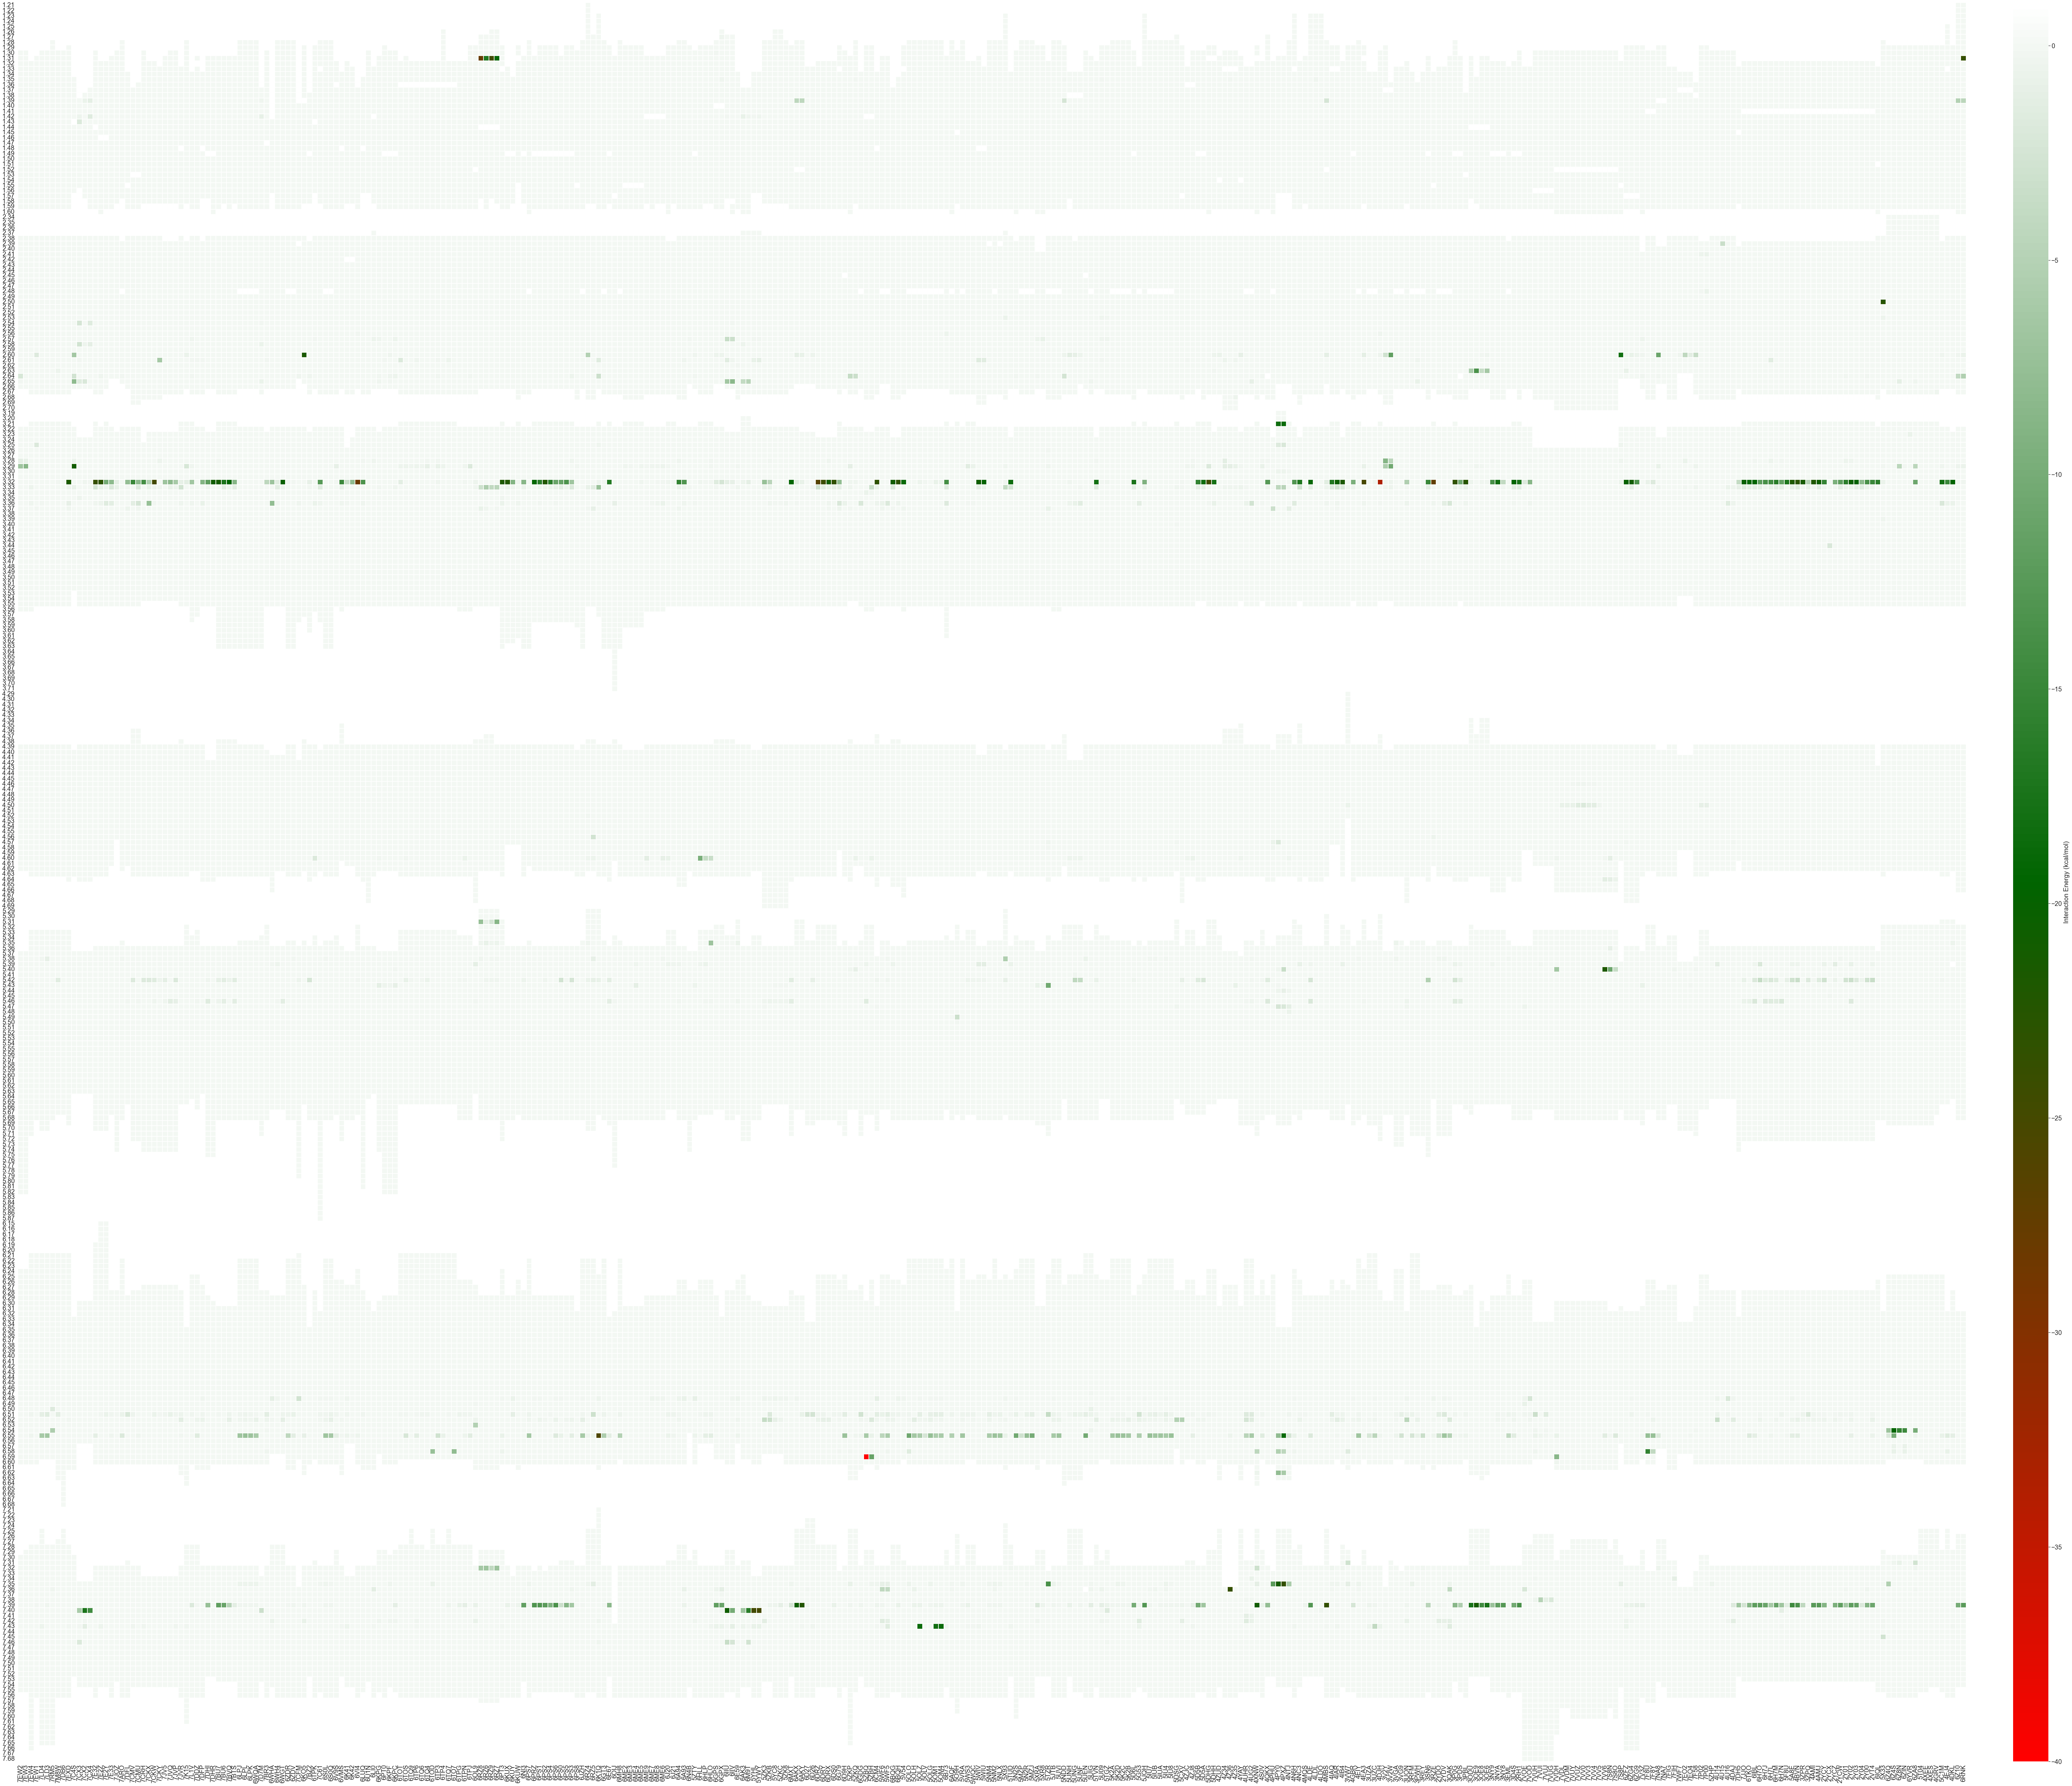

In [137]:
import seaborn as sns
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = [60, 50] #width, height (both in inches)
# matplotlib.rcParams['figure.dpi'] = 300 #width, height (both in inches)

# get bigger plot
plt.subplots(figsize=(130,100))
norm= plt.Normalize(-40,1)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","darkgreen","white"])

ax = sns.heatmap(ml_df,
                 cmap = cmap,
                 norm = norm,
                 xticklabels = PDBids,
                 yticklabels = resnums,
                 #linecolor='gray',
                 cbar_kws={'label': 'Interaction Energy (kcal/mol)', "aspect": 50, "pad":0.02},
                 linewidths = 0.05)

sns.set(font_scale = 1.8)
#plt.title('Heatmap of Interaction Energies for each Structure at each Residue Position', fontsize = 20) # title with fontsize 20
#plt.xlabel('Ballesteros-Weinstein Residue Number', fontsize = 20)
#plt.ylabel('Structure PBDid', fontsize = 20)
plt.ylim([0,len(resnums)])
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.gca().invert_yaxis()
plt.show()